# EECS 498-007/598-005 Assignment 3-2: Convolutional Neural Networks and Batch Normalization

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

**Your Answer:**   
Hello WORLD, #XXXXXXXX

# Convolutional networks
So far we have worked with deep fully-connected networks, using them to explore different optimization strategies and network architectures. Fully-connected networks are a good testbed for experimentation because they are very computationally efficient, but in practice all state-of-the-art results use convolutional networks instead.

First you will implement several layer types that are used in convolutional networks. You will then use these layers to train a convolutional network on the CIFAR-10 dataset.

## Install starter code
We will continue using the utility functions that we've used for Assignment 1 and 2: [`coutils` package](https://github.com/deepvision-class/starter-code). Run this cell to download and install it.


## Setup code
Run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [277]:
import math
import torch
import coutils
from coutils import extract_drive_file_id, register_colab_notebooks, \
                    fix_random_seed, rel_error, compute_numeric_gradient, Solver
import matplotlib.pyplot as plt
import time

# for plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# data type and device for torch.tensor
to_float = {'dtype': torch.float, 'device': 'cpu'}
to_float_cuda = {'dtype': torch.float, 'device': 'cuda'}
to_double = {'dtype': torch.double, 'device': 'cpu'}
to_double_cuda = {'dtype': torch.double, 'device': 'cuda'}
to_long = {'dtype': torch.long, 'device': 'cpu'}
to_long_cuda = {'dtype': torch.long, 'device': 'cuda'}

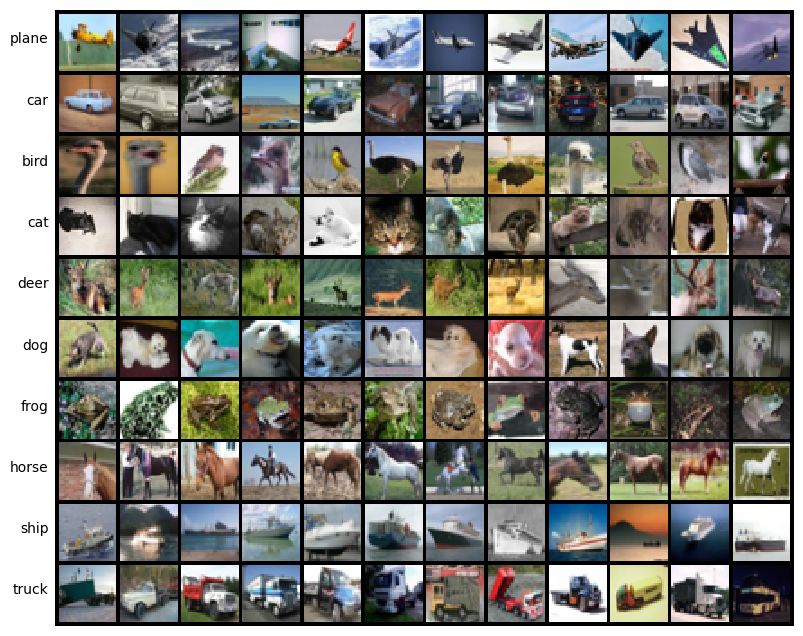

Train data shape:  torch.Size([47500, 3, 32, 32])
Train labels shape:  torch.Size([47500])
Validation data shape:  torch.Size([2500, 3, 32, 32])
Validation labels shape:  torch.Size([2500])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])
Testing Linear.forward function:
difference:  1.9539698955475907e-09
Testing Linear.backward function:
dx error:  2.3407721455324226e-09
dw error:  2.822640465546278e-11
db error:  4.126826025889e-11
Testing ReLU.forward function:
difference:  9.999999034982122e-08
Testing ReLU.backward function:
dx error:  6.5510464861138194e-12
Testing Linear_ReLU.forward and Linear_ReLU.backward:
dx error:  5.510448125317977e-10
dw error:  1.6367898781980706e-09
db error:  5.0959990317728124e-11
Testing svm_loss:
loss:  9.000430792478463
dx error:  2.8043130317900733e-09

Testing softmax_loss:
loss:  2.3026286102347924
dx error:  1.9329571390449453e-08
Testing initialization ... 
Testing test-time forward pass ... 
Testing tr

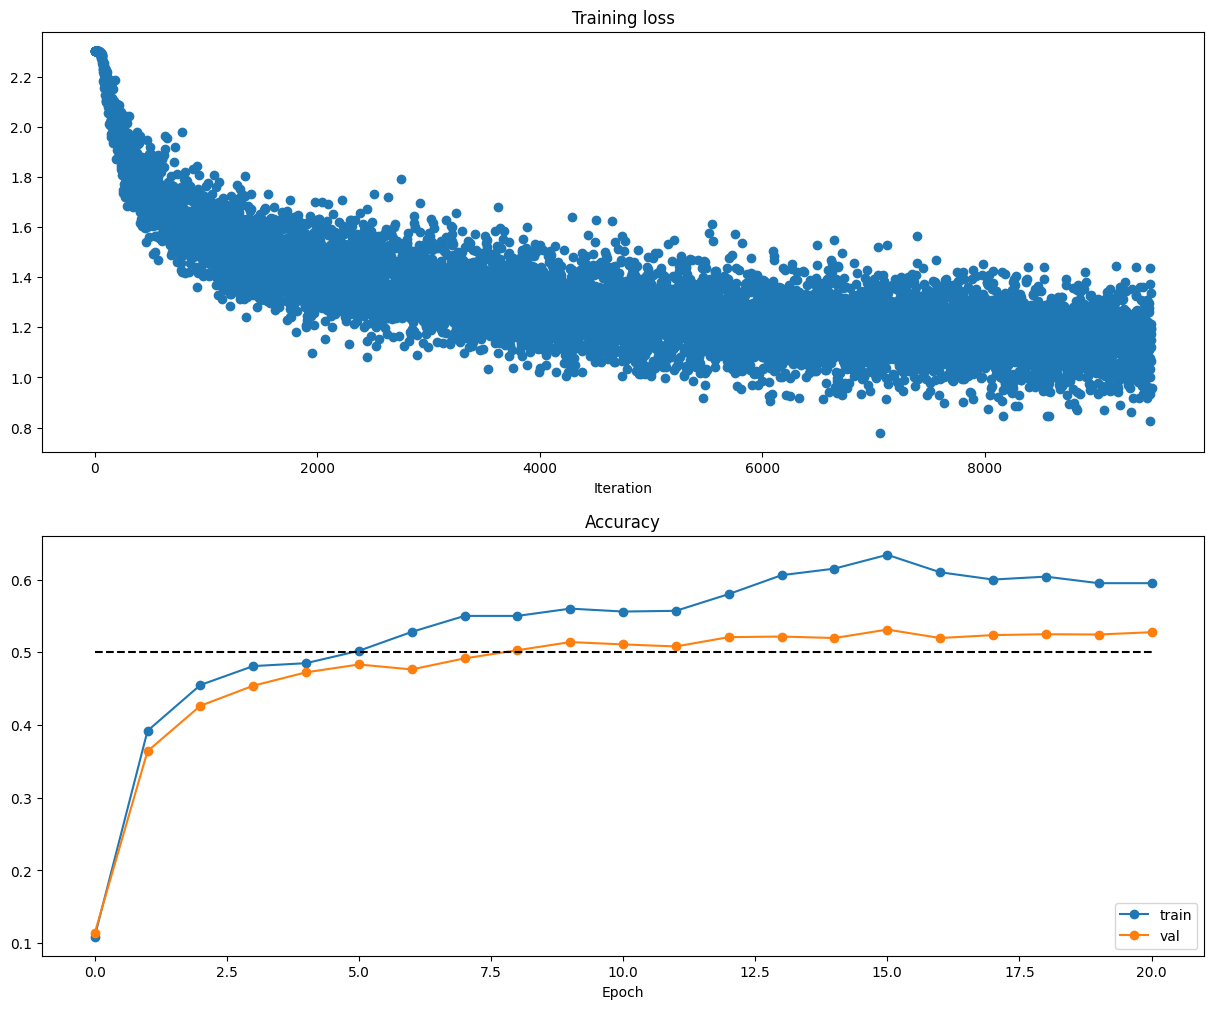

Running check with reg =  0
Initial loss:  2.3053575717037686
W1 relative error: 7.62e-06
W2 relative error: 3.47e-07
W3 relative error: 1.39e-07
b1 relative error: 4.20e-07
b2 relative error: 3.76e-09
b3 relative error: 2.34e-10
Running check with reg =  3.14
Initial loss:  12.278358041494133
W1 relative error: 4.28e-08
W2 relative error: 2.14e-08
W3 relative error: 1.97e-08
b1 relative error: 1.46e-07
b2 relative error: 3.69e-08
b3 relative error: 1.11e-09
(Time 0.00 sec; Iteration 1 / 40) loss: 2.336764
(Epoch 0 / 20) train acc: 0.160000; val_acc: 0.108000
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.109600
(Epoch 2 / 20) train acc: 0.520000; val_acc: 0.140800
(Epoch 3 / 20) train acc: 0.400000; val_acc: 0.142400
(Epoch 4 / 20) train acc: 0.420000; val_acc: 0.162400
(Epoch 5 / 20) train acc: 0.640000; val_acc: 0.150000
(Time 0.07 sec; Iteration 11 / 40) loss: 1.217198
(Epoch 6 / 20) train acc: 0.580000; val_acc: 0.141600
(Epoch 7 / 20) train acc: 0.600000; val_acc: 0.160400
(Epoch

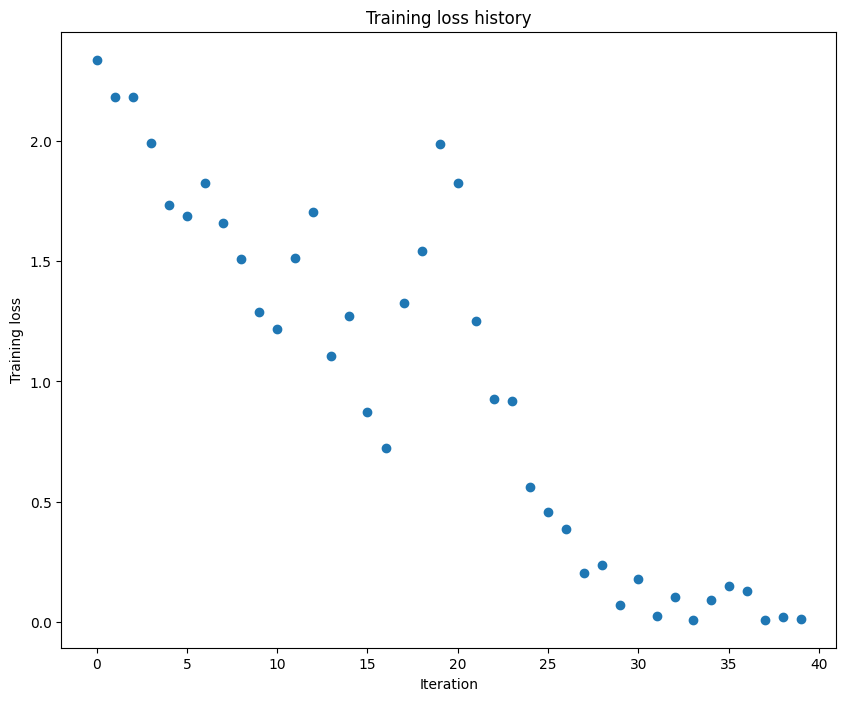

(Time 0.00 sec; Iteration 1 / 40) loss: 2.326581
(Epoch 0 / 20) train acc: 0.160000; val_acc: 0.108400
(Epoch 1 / 20) train acc: 0.360000; val_acc: 0.122000
(Epoch 2 / 20) train acc: 0.500000; val_acc: 0.143600
(Epoch 3 / 20) train acc: 0.600000; val_acc: 0.157200
(Epoch 4 / 20) train acc: 0.500000; val_acc: 0.135600
(Epoch 5 / 20) train acc: 0.780000; val_acc: 0.170800
(Time 0.10 sec; Iteration 11 / 40) loss: 1.050323
(Epoch 6 / 20) train acc: 0.680000; val_acc: 0.158400
(Epoch 7 / 20) train acc: 0.420000; val_acc: 0.165600
(Epoch 8 / 20) train acc: 0.740000; val_acc: 0.162000
(Epoch 9 / 20) train acc: 0.740000; val_acc: 0.155200
(Epoch 10 / 20) train acc: 0.920000; val_acc: 0.172000
(Time 0.20 sec; Iteration 21 / 40) loss: 0.409172
(Epoch 11 / 20) train acc: 0.980000; val_acc: 0.195200
(Epoch 12 / 20) train acc: 0.940000; val_acc: 0.186800
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.196400
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.190800
(Epoch 15 / 20) train acc: 1.000000;

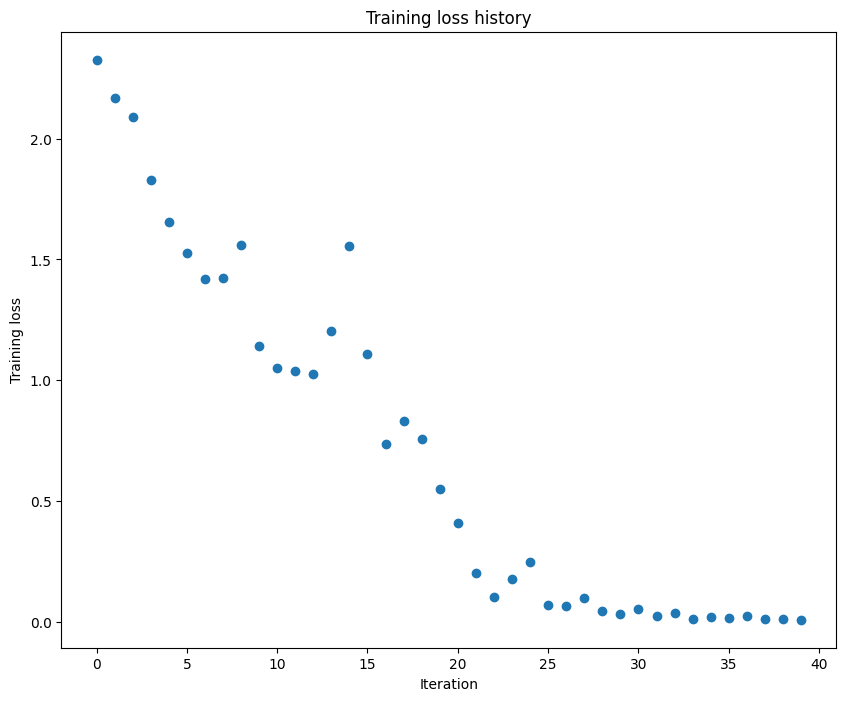

next_w error:  1.7764694224803817e-08
velocity error:  8.538575450103691e-09
running with  sgd
(Time 0.00 sec; Iteration 1 / 200) loss: 2.301703
(Epoch 0 / 5) train acc: 0.106000; val_acc: 0.122400
(Epoch 1 / 5) train acc: 0.099000; val_acc: 0.094000
(Epoch 2 / 5) train acc: 0.099000; val_acc: 0.093600
(Epoch 3 / 5) train acc: 0.143000; val_acc: 0.109200
(Epoch 4 / 5) train acc: 0.112000; val_acc: 0.098800
(Epoch 5 / 5) train acc: 0.108000; val_acc: 0.093600

running with  sgd_momentum
(Time 0.00 sec; Iteration 1 / 200) loss: 2.302076
(Epoch 0 / 5) train acc: 0.091000; val_acc: 0.095600
(Epoch 1 / 5) train acc: 0.112000; val_acc: 0.094800
(Epoch 2 / 5) train acc: 0.175000; val_acc: 0.166400
(Epoch 3 / 5) train acc: 0.180000; val_acc: 0.192400
(Epoch 4 / 5) train acc: 0.240000; val_acc: 0.215600
(Epoch 5 / 5) train acc: 0.308000; val_acc: 0.253200



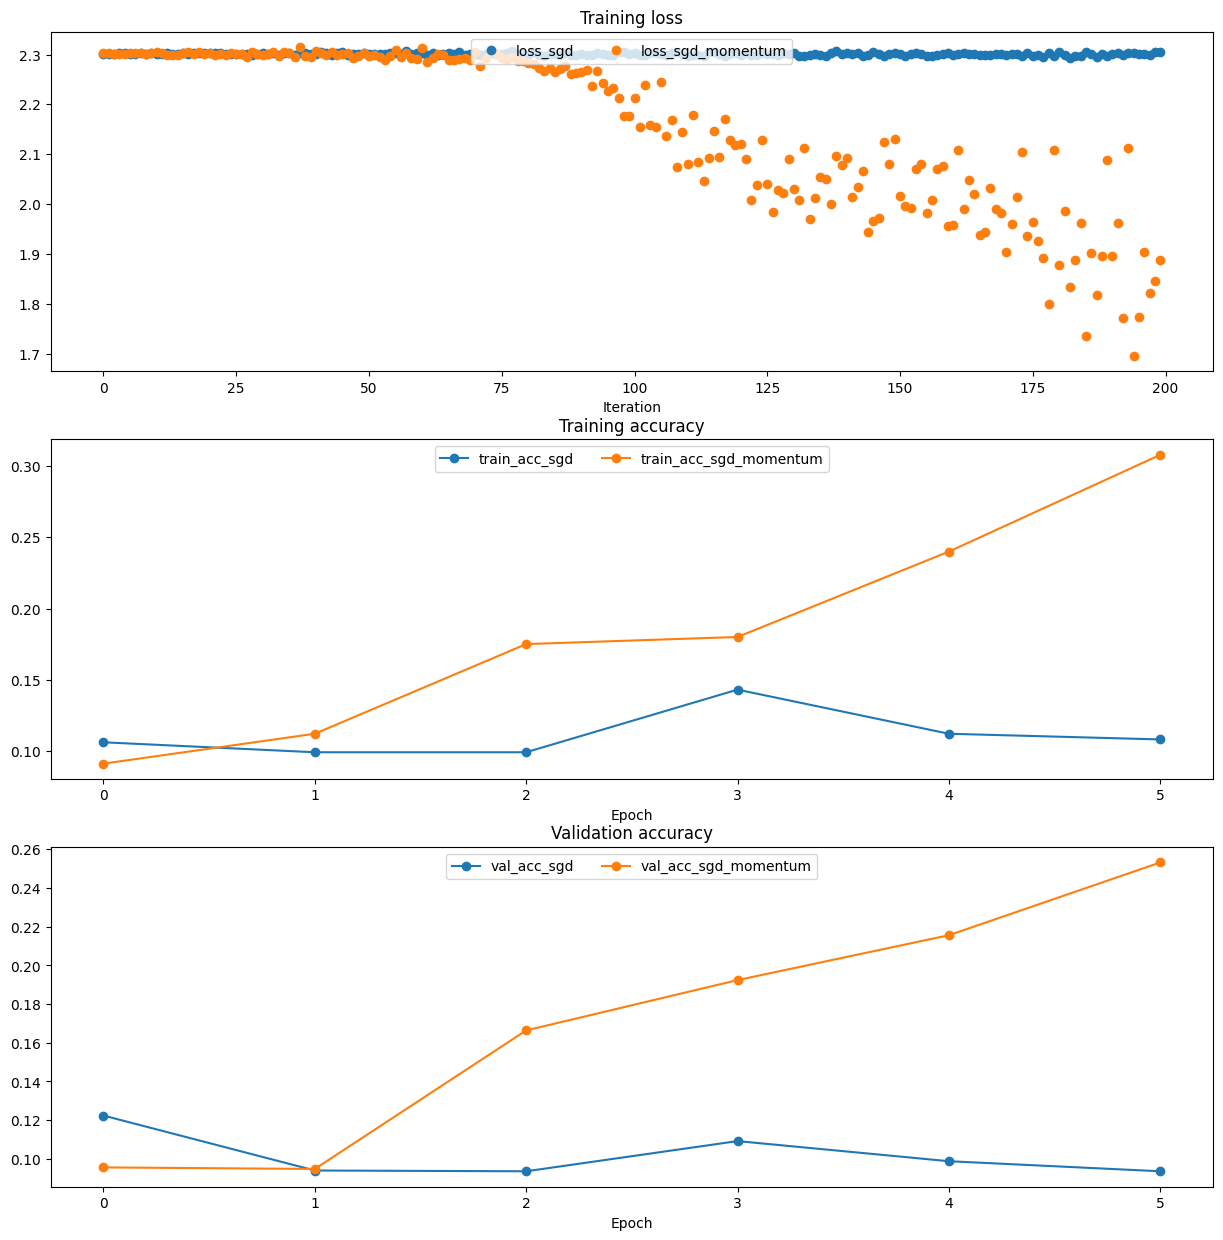

next_w error:  1.9049376836469881e-07
cache error:  5.2955911474095824e-09
next_w error:  2.279138619430699e-07
v error:  8.416628040806327e-09
m error:  8.429926350697003e-09
running with  sgd_momentum
(Time 0.00 sec; Iteration 1 / 200) loss: 2.301703
(Epoch 0 / 5) train acc: 0.124000; val_acc: 0.135200
(Epoch 1 / 5) train acc: 0.270000; val_acc: 0.266400
(Epoch 2 / 5) train acc: 0.351000; val_acc: 0.297600
(Epoch 3 / 5) train acc: 0.361000; val_acc: 0.327600
(Epoch 4 / 5) train acc: 0.400000; val_acc: 0.318000
(Epoch 5 / 5) train acc: 0.434000; val_acc: 0.354400

running with  sgd_momentum
(Time 0.00 sec; Iteration 1 / 200) loss: 2.302076
(Epoch 0 / 5) train acc: 0.168000; val_acc: 0.161600
(Epoch 1 / 5) train acc: 0.231000; val_acc: 0.222400
(Epoch 2 / 5) train acc: 0.257000; val_acc: 0.248000
(Epoch 3 / 5) train acc: 0.258000; val_acc: 0.259600
(Epoch 4 / 5) train acc: 0.299000; val_acc: 0.279600
(Epoch 5 / 5) train acc: 0.337000; val_acc: 0.282800



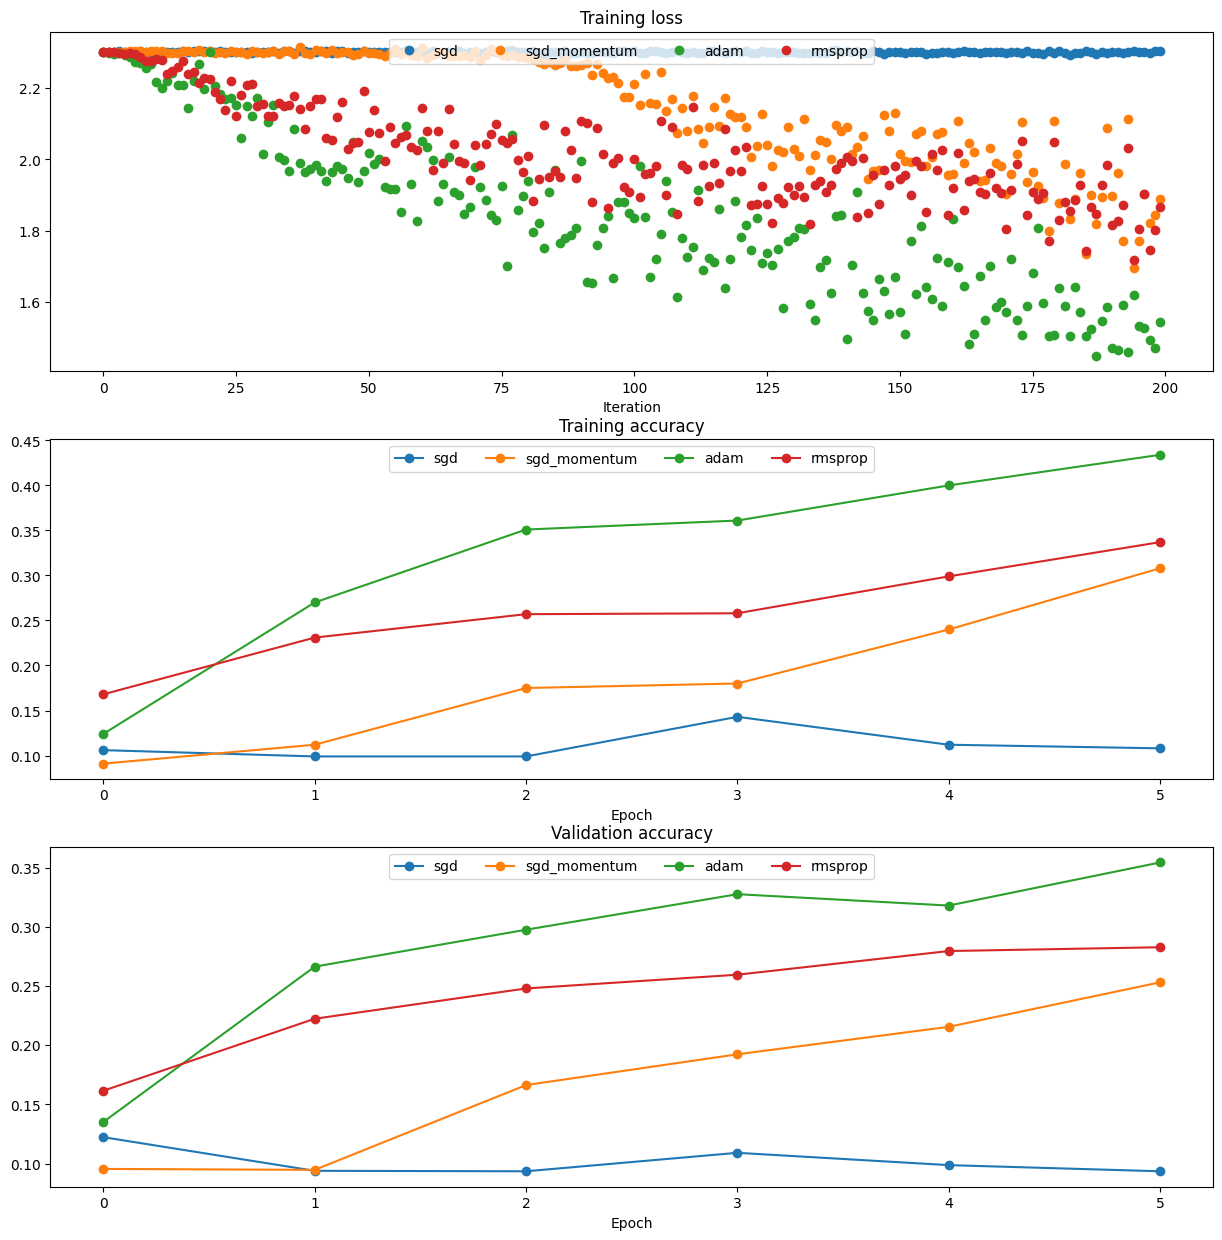

Running tests with p =  0.25
Mean of input:  9.997795815321096
Mean of train-time output:  9.989719683981562
Mean of test-time output:  9.997795815321096
Fraction of train-time output set to zero:  0.2505599856376648
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.4
Mean of input:  9.997795815321096
Mean of train-time output:  9.977589272343012
Mean of test-time output:  9.997795815321096
Fraction of train-time output set to zero:  0.40133199095726013
Fraction of test-time output set to zero:  0.0

Running tests with p =  0.7
Mean of input:  9.997795815321096
Mean of train-time output:  10.012178029203898
Mean of test-time output:  9.997795815321096
Fraction of train-time output set to zero:  0.6997119784355164
Fraction of test-time output set to zero:  0.0

dx relative error:  1.0891221439148332e-10
Running check with dropout =  0
Initial loss:  2.3053575717037686
W1 relative error: 7.62e-06
W2 relative error: 3.47e-07
W3 relative error: 1.39e-07
b1 relative 

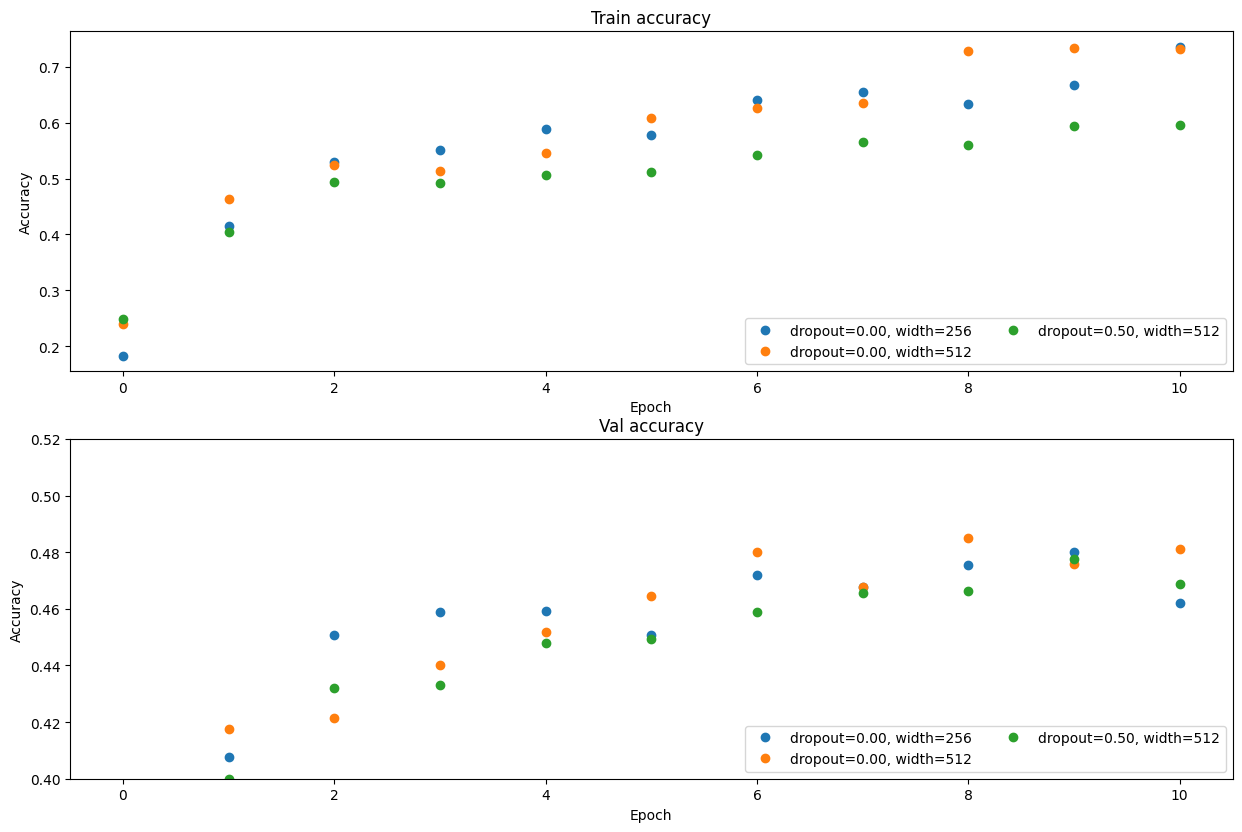

In [278]:
# %% [markdown]
# # EECS 498-007/598-005 Assignment 3-1: Fully-Connected Neural Networks and Dropout
# 
# Before we start, please put your name and UMID in following format
# 
# : Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

# %% [markdown]
# **Your Answer:**   
# Hello WORLD, #XXXXXXXX

# %% [markdown]
# # Fully-connected neural networks
# In the previous homework you implemented a fully-connected two-layer neural network on CIFAR-10. The implementation was simple but not very modular since the loss and gradient were computed in a single monolithic function. This is manageable for a simple two-layer network, but would become impractical as we move to bigger models. Ideally we want to build networks using a more modular design so that we can implement different layer types in isolation and then snap them together into models with different architectures.

# %% [markdown]
# In this exercise we will implement fully-connected networks using a more modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:
# 
# ```python
# def forward(x, w):
#   """ Receive inputs x and weights w """
#   # Do some computations ...
#   z = # ... some intermediate value
#   # Do some more computations ...
#   out = # the output
#    
#   cache = (x, w, z, out) # Values we need to compute gradients
#    
#   return out, cache
# ```
# 
# The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:
# 
# ```python
# def backward(dout, cache):
#   """
#   Receive dout (derivative of loss with respect to outputs) and cache,
#   and compute derivative with respect to inputs.
#   """
#   # Unpack cache values
#   x, w, z, out = cache
#   
#   # Use values in cache to compute derivatives
#   dx = # Derivative of loss with respect to x
#   dw = # Derivative of loss with respect to w
#   
#   return dx, dw
# ```
# 
# After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.
# 
# In addition to implementing fully-connected networks of arbitrary depth, we will also explore different update rules for optimization, and introduce Dropout as a regularizer as a tool to more efficiently optimize deep networks.
#   

# %% [markdown]
# ## Install starter code
# We will continue using the utility functions that we've used for Assignment 1 and 2: [`coutils` package](https://github.com/deepvision-class/starter-code). Run this cell to download and install it.
# 

# %% [markdown]
# ## Setup code
# Run some setup code for this notebook: Import some useful packages and increase the default figure size.

# %%
import math
import torch
import coutils
from coutils import fix_random_seed, rel_error, compute_numeric_gradient, Solver
import matplotlib.pyplot as plt

# for plotting
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# data type and device for torch.tensor
to_float = {'dtype': torch.float, 'device': 'cpu'}
to_float_cuda = {'dtype': torch.float, 'device': 'cuda'}
to_double = {'dtype': torch.double, 'device': 'cpu'}
to_double_cuda = {'dtype': torch.double, 'device': 'cuda'}
to_long = {'dtype': torch.long, 'device': 'cpu'}
to_long_cuda = {'dtype': torch.long, 'device': 'cuda'}

# %% [markdown]
# ## Load CIFAR-10 data
# Here we provide a function to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

# %%
def get_CIFAR10_data(validation_ratio=0.05, cuda=True, reshape_to_2d=False,
                     visualize=False):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.
  """
  X_train, y_train, X_test, y_test = coutils.data.cifar10()

  # Load every data on cuda
  if cuda:
    # print("YES")
    X_train = X_train.cuda()
    y_train = y_train.cuda()
    X_test = X_test.cuda()
    y_test = y_test.cuda()

  # 0. Visualize some examples from the dataset.
  class_names = [
      'plane', 'car', 'bird', 'cat', 'deer',
      'dog', 'frog', 'horse', 'ship', 'truck'
  ]
  if visualize:
    img = coutils.utils.visualize_dataset(X_train, y_train, 12, class_names)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

  # 1. Normalize the data: subtract the mean RGB (zero mean)
  mean_image = X_train.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
  X_train -= mean_image
  X_test -= mean_image

  # 2. Reshape the image data into rows
  if reshape_to_2d:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

  # 3. Take the validation set from the training set
  # Note: It should not be taken from the test set
  # For random permumation, you can use torch.randperm or torch.randint
  # But, for this homework, we use slicing instead.
  num_training = int( X_train.shape[0] * (1.0 - validation_ratio) )
  num_validation = X_train.shape[0] - num_training

  # return the dataset
  data_dict = {}
  data_dict['X_val'] = X_train[num_training:num_training + num_validation]
  data_dict['y_val'] = y_train[num_training:num_training + num_validation]
  data_dict['X_train'] = X_train[0:num_training]
  data_dict['y_train'] = y_train[0:num_training]

  data_dict['X_test'] = X_test
  data_dict['y_test'] = y_test
  return data_dict

# %%
# Invoke the above function to get our data.
data_dict = get_CIFAR10_data(visualize=True)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

# %% [markdown]
# # Linear layer

# %% [markdown]
# For each layer we implement, we will define a class with two static methods `forward` and `backward`.
# 
# For now the `forward` and `backward` methods are stubs. We will actually implement them in the following cells.

# %%
class Linear(object):

  @staticmethod
  def forward(x, w, b):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

# %% [markdown]
# ## Linear layer: forward
# Implement the `Linear.forward` function. Once you are done you can test your implementaion by running the next cell:

# %%
def linear_forward(x, w, b):
  """
  Computes the forward pass for an linear (fully-connected) layer.
  The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
  examples, where each example x[i] has shape (d_1, ..., d_k). We will
  reshape each input into a vector of dimension D = d_1 * ... * d_k, and
  then transform it to an output vector of dimension M.
  Inputs:
  - x: A tensor containing input data, of shape (N, d_1, ..., d_k)
  - w: A tensor of weights, of shape (D, M)
  - b: A tensor of biases, of shape (M,)
  Returns a tuple of:
  - out: output, of shape (N, M)
  - cache: (x, w, b)
  """
  out = None
  #############################################################################
  # TODO: Implement the linear forward pass. Store the result in out. You     #
  # will need to reshape the input into rows.                                 #
  #############################################################################
  # Replace "pass" statement with your code
  newx = x.reshape(x.shape[0],-1) #[N, d_1, ..., d_k] => [N, D]
  out = newx.mm(w)+b.reshape(1,b.shape[0]) #[N, M]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = (x, w, b)
  return out, cache

Linear.forward = linear_forward

# %% [markdown]
# Test the `Linear.forward` function. You should see errors less than `1e-8`.

# %%
# Test the Linear.forward function
num_inputs = 2
input_shape = torch.tensor((4, 5, 6))
output_dim = 3

input_size = num_inputs * torch.prod(input_shape)
weight_size = output_dim * torch.prod(input_shape)

x = torch.linspace(-0.1, 0.5, steps=input_size, **to_double_cuda).reshape(num_inputs, *input_shape)
w = torch.linspace(-0.2, 0.3, steps=weight_size, **to_double_cuda).reshape(torch.prod(input_shape), output_dim)
b = torch.linspace(-0.3, 0.1, steps=output_dim, **to_double_cuda)

out, _ = Linear.forward(x, w, b)
correct_out = torch.tensor([[ 1.49834967,  1.70660132,  1.91485297],
                            [ 3.25553199,  3.5141327,   3.77273342]],
                            **to_double_cuda)

print('Testing Linear.forward function:')
print('difference: ', rel_error(out, correct_out))

# %% [markdown]
# ## Linear layer: backward
# Now implement the `Linear.backward` function and test your implementation using numeric gradient checking.

# %%
def linear_backward(dout, cache):
  """
  Computes the backward pass for an linear layer.
  Inputs:
  - dout: Upstream derivative, of shape (N, M)
  - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)
    - b: Biases, of shape (M,)
  Returns a tuple of:
  - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
  - dw: Gradient with respect to w, of shape (D, M)
  - db: Gradient with respect to b, of shape (M,)
  """
  x, w, b = cache
  dx, dw, db = None, None, None
  #############################################################################
  # TODO: Implement the linear backward pass.                                 #
  #############################################################################
  # Replace "pass" statement with your code
  db = dout.sum(dim = 0)
  dx = torch.mm(dout,w.t()).reshape(x.shape) #[N, d1, ..., d_k]
  newx = x.reshape(x.shape[0],-1) # [N, D]
  dw = newx.t().mm(dout)
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx, dw, db

Linear.backward = linear_backward

# %% [markdown]
# Run the following to test your implementation of `Linear.backward`. You should see errors less than `1e-8`.

# %%
# Test the Linear.backward function
fix_random_seed(0)
x = torch.randn(10, 2, 3, **to_double_cuda)
w = torch.randn(6, 5, **to_double_cuda)
b = torch.randn(5, **to_double_cuda)
dout = torch.randn(10, 5, **to_double_cuda)

dx_num = compute_numeric_gradient(lambda x: Linear.forward(x, w, b)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Linear.forward(x, w, b)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Linear.forward(x, w, b)[0], b, dout)

_, cache = Linear.forward(x, w, b)
dx, dw, db = Linear.backward(dout, cache)

# The error should be around e-10 or less
print('Testing Linear.backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

# %% [markdown]
# # ReLU activation

# %% [markdown]
# We will now implement the ReLU nonlinearity. As above, we will define a class with two empty static methods, and implement them in upcoming cells.

# %%
class ReLU(object):

  @staticmethod
  def forward(x, w, b):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

# %% [markdown]
# ## ReLU activation: forward
# Implement the forward pass for the ReLU activation function in the `ReLU.forward` function.
# 
# You should not change the input tensor with an in-place operation.

# %%
def relu_forward(x):
  """
  Computes the forward pass for a layer of rectified linear units (ReLUs).
  Input:
  - x: Input; a tensor of any shape
  Returns a tuple of:
  - out: Output, a tensor of the same shape as x
  - cache: x
  """
  out = None
  #############################################################################
  # TODO: Implement the ReLU forward pass.                                    #
  # You should not change the input tensor with an in-place operation.        #
  #############################################################################
  # Replace "pass" statement with your code
  out = x.clone()
  out[out<0]=0
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = x
  return out, cache

ReLU.forward = relu_forward

# %% [markdown]
# Run the following to test your implementation of the ReLU forward pass. Your errors should be less than `1e-7`.

# %%
# Test the relu_forward function
x = torch.linspace(-0.5, 0.5, steps=12, **to_double_cuda).reshape(3, 4)

out, _ = ReLU.forward(x)
correct_out = torch.tensor([[ 0.,          0.,          0.,          0.,        ],
                            [ 0.,          0.,          0.04545455,  0.13636364,],
                            [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]],
                            **to_double_cuda)

# Compare your output with ours. The error should be on the order of e-8
print('Testing ReLU.forward function:')
print('difference: ', rel_error(out, correct_out))

# %% [markdown]
# ## ReLU activation: backward
# Now implement the backward pass for the ReLU activation function.
# 
# Again, you should not change the input tensor with an in-place operation.

# %%
def relu_backward(dout, cache):
  """
  Computes the backward pass for a layer of rectified linear units (ReLUs).
  Input:
  - dout: Upstream derivatives, of any shape
  - cache: Input x, of same shape as dout
  Returns:
  - dx: Gradient with respect to x
  """
  dx, x = None, cache
  #############################################################################
  # TODO: Implement the ReLU backward pass.                                   #
  # You should not change the input tensor with an in-place operation.        #
  #############################################################################
  # Replace "pass" statement with your code
  dx = dout
  dx[x<=0] = 0 
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx

ReLU.backward = relu_backward

# %% [markdown]
# Run the following to test your implementation of `ReLU.backward`. Your errors should be less than `1e-10`.

# %%
fix_random_seed(0)
x = torch.randn(10, 10, **to_double_cuda)
dout = torch.randn(*x.shape, **to_double_cuda)

dx_num = compute_numeric_gradient(lambda x: ReLU.forward(x)[0], x, dout)

_, cache = ReLU.forward(x)
dx = ReLU.backward(dout, cache)

# The error should be on the order of e-12
print('Testing ReLU.backward function:')
print('dx error: ', rel_error(dx_num, dx))

# %% [markdown]
# # "Sandwich" layers
# There are some common patterns of layers that are frequently used in neural nets. For example, linear layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define a convenience layer.
# 
# This also shows how our layer abstraction allows us to implement new layers by composing existing layer implementations. This is a powerful mechanism for structuring deep learning code in a modular fashion.
# 
# For now take a look at the `forward` and `backward` functions in `Linear_ReLU`, and run the following to numerically gradient check the backward pass:

# %%
class Linear_ReLU(object):

  @staticmethod
  def forward(x, w, b):
    """
    Convenience layer that perorms an linear transform followed by a ReLU.

    Inputs:
    - x: Input to the linear layer
    - w, b: Weights for the linear layer
    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = Linear.forward(x, w, b)
    out, relu_cache = ReLU.forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the linear-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = ReLU.backward(dout, relu_cache)
    dx, dw, db = Linear.backward(da, fc_cache)
    return dx, dw, db

# %% [markdown]
# Run the following to test the implementation of the `Linear_ReLU` layer using numeric gradient checking. You should see errors less than `1e-8`

# %%
fix_random_seed(0)
x = torch.randn(2, 3, 4, **to_double_cuda)
w = torch.randn(12, 10, **to_double_cuda)
b = torch.randn(10, **to_double_cuda)
dout = torch.randn(2, 10, **to_double_cuda)

out, cache = Linear_ReLU.forward(x, w, b)
dx, dw, db = Linear_ReLU.backward(dout, cache)

dx_num = compute_numeric_gradient(lambda x: Linear_ReLU.forward(x, w, b)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Linear_ReLU.forward(x, w, b)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Linear_ReLU.forward(x, w, b)[0], b, dout)

# Relative error should be around e-8 or less
print('Testing Linear_ReLU.forward and Linear_ReLU.backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

# %% [markdown]
# # Loss layers: Softmax and SVM
# You implemented these loss functions in the last assignment, so we'll give them to you for free here. You should still make sure you understand how they work by looking at the implementations.
# 
# You can make sure that the implementations are correct by running the following:

# %%
def svm_loss(x, y):
  """
  Computes the loss and gradient using for multiclass SVM classification.
  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
    class for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C
  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """
  N = x.shape[0]
  correct_class_scores = x[torch.arange(N), y]
  margins = (x - correct_class_scores[:, None] + 1.0).clamp(min=0.)
  margins[torch.arange(N), y] = 0.
  loss = margins.sum() / N
  num_pos = (margins > 0).sum(dim=1)
  dx = torch.zeros_like(x)
  dx[margins > 0] = 1.
  dx[torch.arange(N), y] -= num_pos.to(dx.dtype)
  dx /= N
  return loss, dx


def softmax_loss(x, y):
  """
  Computes the loss and gradient for softmax classification.
  Inputs:
  - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
    class for the ith input.
  - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C
  Returns a tuple of:
  - loss: Scalar giving the loss
  - dx: Gradient of the loss with respect to x
  """
  shifted_logits = x - x.max(dim=1, keepdim=True).values
  Z = shifted_logits.exp().sum(dim=1, keepdim=True)
  log_probs = shifted_logits - Z.log()
  probs = log_probs.exp()
  N = x.shape[0]
  loss = (-1.0/ N) * log_probs[torch.arange(N), y].sum()
  dx = probs.clone()
  dx[torch.arange(N), y] -= 1
  dx /= N
  return loss, dx

# %% [markdown]
# Run the following to perform numeric gradient checking on the two loss functions. You should see errors less than `1e-7`.

# %%
fix_random_seed(0)
num_classes, num_inputs = 10, 50
x = 0.001 * torch.randn(num_inputs, num_classes, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

dx_num = compute_numeric_gradient(lambda x: svm_loss(x, y)[0], x)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be around the order of e-9
print('Testing svm_loss:')
print('loss: ', loss.item())
print('dx error: ', rel_error(dx_num, dx))

dx_num = compute_numeric_gradient(lambda x: softmax_loss(x, y)[0], x)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss.item())
print('dx error: ', rel_error(dx_num, dx))

# %% [markdown]
# # Two-layer network
# In the previous assignment you implemented a two-layer neural network in a single monolithic class. Now that you have implemented modular versions of the necessary layers, you will reimplement the two layer network using these modular implementations.
# 
# Complete the implementation of the `TwoLayerNet` class. This class will serve as a model for the other networks you will implement in this assignment, so read through it to make sure you understand the API. You can run the cell below to test your implementation.

# %%
class TwoLayerNet(object):
  """
  A two-layer fully-connected neural network with ReLU nonlinearity and
  softmax loss that uses a modular layer design. We assume an input dimension
  of D, a hidden dimension of H, and perform classification over C classes.
  The architecure should be linear - relu - linear - softmax.
  Note that this class does not implement gradient descent; instead, it
  will interact with a separate Solver object that is responsible for running
  optimization.

  The learnable parameters of the model are stored in the dictionary
  self.params that maps parameter names to PyTorch tensors.
  """

  def __init__(self, input_dim=3*32*32, hidden_dim=100, num_classes=10,
         weight_scale=1e-3, reg=0.0, dtype=torch.float32, device='cpu'):
    """
    Initialize a new network.
    Inputs:
    - input_dim: An integer giving the size of the input
    - hidden_dim: An integer giving the size of the hidden layer
    - num_classes: An integer giving the number of classes to classify
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - reg: Scalar giving L2 regularization strength.
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'
    """
    self.params = {}
    self.reg = reg

    ###########################################################################
    # TODO: Initialize the weights and biases of the two-layer net. Weights   #
    # should be initialized from a Gaussian centered at 0.0 with              #
    # standard deviation equal to weight_scale, and biases should be          #
    # initialized to zero. All weights and biases should be stored in the     #
    # dictionary self.params, with first layer weights                        #
    # and biases using the keys 'W1' and 'b1' and second layer                #
    # weights and biases using the keys 'W2' and 'b2'.                        #
    ###########################################################################
    # Replace "pass" statement with your code
    self.params['W1'] = weight_scale * torch.randn(input_dim, hidden_dim, device=device)
    self.params['b1'] = torch.zeros(hidden_dim, device=device)
    self.params['W2'] = weight_scale * torch.randn(hidden_dim, num_classes, device=device)
    self.params['b2'] = torch.zeros(num_classes, device=device)
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################


  def loss(self, X, y=None):
    """
    Compute loss and gradient for a minibatch of data.

    Inputs:
    - X: Tensor of input data of shape (N, d_1, ..., d_k)
    - y: int64 Tensor of labels, of shape (N,). y[i] gives the label for X[i].

    Returns:
    If y is None, then run a test-time forward pass of the model and return:
    - scores: Tensor of shape (N, C) giving classification scores, where
      scores[i, c] is the classification score for X[i] and class c.
    If y is not None, then run a training-time forward and backward pass and
    return a tuple of:
    - loss: Scalar value giving the loss
    - grads: Dictionary with the same keys as self.params, mapping parameter
      names to gradients of the loss with respect to those parameters.
    """
    scores = None
    ###########################################################################
    # TODO: Implement the forward pass for the two-layer net, computing the   #
    # class scores for X and storing them in the scores variable.             #
    ###########################################################################
    # Replace "pass" statement with your code
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    out1, cache1 = Linear_ReLU.forward(X,W1,b1)
    scores, cache2 = Linear.forward(out1,W2,b2)
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################

    # If y is None then we are in test mode so just return scores
    if y is None:
      return scores

    loss, grads = 0, {}
    ###########################################################################
    # TODO: Implement the backward pass for the two-layer net. Store the loss #
    # in the loss variable and gradients in the grads dictionary. Compute data#
    # loss using softmax, and make sure that grads[k] holds the gradients for #
    # self.params[k]. Don't forget to add L2 regularization!                  #
    #                                                                         #
    # NOTE: To ensure that your implementation matches ours and you pass the  #
    # automated tests, make sure that your L2 regularization does not include #
    # a factor of 0.5.                                                        #
    ###########################################################################
    # Replace "pass" statement with your code
    loss, ds = softmax_loss(scores,y)
    loss += self.reg*torch.sum(W1*W1) + self.reg*torch.sum(W2*W2)
    dh, dW2, db2 = Linear.backward(ds,cache2)
    dX, dW1, db1 = Linear_ReLU.backward(dh,cache1)
    dW2 += 2*self.reg*self.params['W2']
    dW1 += 2*self.reg*self.params['W1']
    grads['b2'] = db2
    grads['W2'] = dW2
    grads['b1'] = db1
    grads['W1'] = dW1 
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################

    return loss, grads

# %% [markdown]
# Once you have finished implementing the forward and backward passes of your two-layer net, run the following to test your implementation:

# %%
fix_random_seed(0)
N, D, H, C = 3, 5, 50, 7
X = torch.randn(N, D, **to_double_cuda)
y = torch.randint(C, size=(N,), **to_long_cuda)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std,
                    **to_double_cuda)

print('Testing initialization ... ')
W1_std = torch.abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = torch.abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert torch.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert torch.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = torch.linspace(-0.7, 0.3, steps=D*H, **to_double_cuda).reshape(D, H)
model.params['b1'] = torch.linspace(-0.1, 0.9, steps=H, **to_double_cuda)
model.params['W2'] = torch.linspace(-0.3, 0.4, steps=H*C, **to_double_cuda).reshape(H, C)
model.params['b2'] = torch.linspace(-0.9, 0.1, steps=C, **to_double_cuda)
X = torch.linspace(-5.5, 4.5, steps=N*D, **to_double_cuda).reshape(D, N).t()
scores = model.loss(X)
correct_scores = torch.tensor(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]],
    **to_double_cuda)
scores_diff = torch.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = torch.tensor([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 49.719461034881775
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-6 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

# %% [markdown]
# # Solver
# In the previous assignment, the logic for training models was coupled to the models themselves. Following a more modular design, for this assignment we have split the logic for training models into a separate class.
# 
# Read through `help(Solver)` to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.

# %%
print(help(Solver))

# %%
fix_random_seed(0)
model = TwoLayerNet(dtype=torch.float, device='cuda')
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
# Replace "pass" statement with your code
# print(data_dict['X_train'].device)
solver = Solver(model, data_dict, lr_decay=0.9, optim_config={'learning_rate':1e-1}, num_epochs=20, device='cuda')
solver.train()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# %%
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# %% [markdown]
# # Multilayer network
# Next you will implement a fully-connected network with an arbitrary number of hidden layers.
# 
# Read through the `FullyConnectedNet` class.
# 
# Implement the initialization, the forward pass, and the backward pass. For the moment don't worry about implementing dropout; we will add this feature soon.

# %%
class FullyConnectedNet(object):
  """
  A fully-connected neural network with an arbitrary number of hidden layers,
  ReLU nonlinearities, and a softmax loss function.
  For a network with L layers, the architecture will be:

  {linear - relu - [dropout]} x (L - 1) - linear - softmax

  where dropout is optional, and the {...} block is repeated L - 1 times.

  Similar to the TwoLayerNet above, learnable parameters are stored in the
  self.params dictionary and will be learned using the Solver class.
  """

  def __init__(self, hidden_dims, input_dim=3*32*32, num_classes=10,
               dropout=0.0, reg=0.0, weight_scale=1e-2, seed=None,
               dtype=torch.float, device='cpu'):
    """
    Initialize a new FullyConnectedNet.

    Inputs:
    - hidden_dims: A list of integers giving the size of each hidden layer.
    - input_dim: An integer giving the size of the input.
    - num_classes: An integer giving the number of classes to classify.
    - dropout: Scalar between 0 and 1 giving the drop probability for networks
      with dropout. If dropout=0 then the network should not use dropout.
    - reg: Scalar giving L2 regularization strength.
    - weight_scale: Scalar giving the standard deviation for random
      initialization of the weights.
    - seed: If not None, then pass this random seed to the dropout layers. This
      will make the dropout layers deteriminstic so we can gradient check the
      model.
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'
    """
    self.use_dropout = dropout != 0
    self.reg = reg
    self.num_layers = 1 + len(hidden_dims)
    self.dtype = dtype
    self.params = {}

    ############################################################################
    # TODO: Initialize the parameters of the network, storing all values in    #
    # the self.params dictionary. Store weights and biases for the first layer #
    # in W1 and b1; for the second layer use W2 and b2, etc. Weights should be #
    # initialized from a normal distribution centered at 0 with standard       #
    # deviation equal to weight_scale. Biases should be initialized to zero.   #
    ############################################################################
    # Replace "pass" statement with your code
    self.params['W1'] = weight_scale*torch.randn(input_dim, hidden_dims[0], device=device, dtype=dtype)
    self.params['b1'] = torch.zeros(hidden_dims[0], device=device, dtype=dtype)
    L = self.num_layers
    for i in range(2,L):
      self.params['W'+str(i)] = weight_scale*torch.randn(hidden_dims[i-2], hidden_dims[i-1], device=device, dtype=dtype)
      self.params['b'+str(i)] = torch.zeros(hidden_dims[i-1], device=device, dtype=dtype)
    self.params['W'+str(L)] = weight_scale*torch.randn(hidden_dims[L-2], num_classes, device=device, dtype=dtype)
    self.params['b'+str(L)] = torch.zeros(num_classes, device=device, dtype=dtype)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    # When using dropout we need to pass a dropout_param dictionary to each
    # dropout layer so that the layer knows the dropout probability and the mode
    # (train / test). You can pass the same dropout_param to each dropout layer.
    self.dropout_param = {}
    if self.use_dropout:
      self.dropout_param = {'mode': 'train', 'p': dropout}
      if seed is not None:
        self.dropout_param['seed'] = seed


  def loss(self, X, y=None):
    """
    Compute loss and gradient for the fully-connected net.
    Input / output: Same as TwoLayerNet above.
    """
    X = X.to(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params and dropout param since they
    # behave differently during training and testing.
    if self.use_dropout:
      self.dropout_param['mode'] = mode
    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the fully-connected net, computing  #
    # the class scores for X and storing them in the scores variable.          #
    #                                                                          #
    # When using dropout, you'll need to pass self.dropout_param to each       #
    # dropout forward pass.                                                    #
    ############################################################################
    # Replace "pass" statement with your code
    L, h = self.num_layers, X
    caches, drop_caches = [], []
    for i in range(1,L): # Layer 1 ~ L-1  
      w, b = self.params['W'+str(i)], self.params['b'+str(i)]
      h, ci = Linear_ReLU.forward(h,w,b)
      caches.append(ci)
      if(self.use_dropout): # Dropout
        h, di = Dropout.forward(h, self.dropout_param)
        drop_caches.append(di)
    # Layer L
    scores, cL = Linear.forward(h,self.params['W'+str(L)], self.params['b'+str(L)])
    caches.append(cL)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    # If test mode return early
    if mode == 'test':
      return scores

    loss, grads = 0.0, {}
    ############################################################################
    # TODO: Implement the backward pass for the fully-connected net. Store the #
    # loss in the loss variable and gradients in the grads dictionary. Compute #
    # data loss using softmax, and make sure that grads[k] holds the gradients #
    # for self.params[k]. Don't forget to add L2 regularization!               #
    # NOTE: To ensure that your implementation matches ours and you pass the   #
    # automated tests, make sure that your L2 regularization includes a factor #
    # of 0.5 to simplify the expression for the gradient.                      #
    ############################################################################
    # Replace "pass" statement with your code
    loss, ds = softmax_loss(scores,y) # softmax 算 loss, d(scores)
    for i in range(L):
      loss += self.reg*torch.sum(self.params['W'+str(i+1)] ** 2)

    dout, dw, db = Linear.backward(ds,caches[L-1]) # 反向传播 linear, dw = dWL
    grads['W'+str(L)] = dw + 2*self.reg*self.params['W' + str(L)]
    grads['b'+str(L)] = db
    for i in range(L-1,0,-1): # 反向传播 linear - ReLU
      if self.use_dropout:
        dout = Dropout.backward(dout,drop_caches[i-1])
      dout, dw, db = Linear_ReLU.backward(dout,caches[i-1])
      grads['W'+str(i)] = dw + 2*self.reg*self.params['W' + str(i)]
      grads['b'+str(i)] = db
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    return loss, grads

# %% [markdown]
# ## Initial loss and gradient check
# 
# As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?
# 
# For gradient checking, you should expect to see errors less than `1e-6`, except for the check on `W1` and `W2` with `reg=0` where your errors should be less than `1e-5`.

# %%
fix_random_seed(0)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = torch.randn(N, D, **to_double_cuda)
y = torch.randint(C, size=(N,), **to_long_cuda)

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, **to_double_cuda)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss.item())

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

# %% [markdown]
# As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. In the following cell, tweak the **learning rate** and **weight initialization scale** to overfit and achieve 100% training accuracy within 20 epochs.

# %%
# TODO: Use a three-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.
fix_random_seed(0)

num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

weight_scale = 1e-2   # Experiment with this!
learning_rate = 1e-4  # Experiment with this!
############################################################################
# TODO: Change weight_scale and learning_rate so your model achieves 100%  #
# training accuracy within 20 epochs.                                      #
############################################################################
# Replace "pass" statement with your code
weight_scale = 5e-2
learning_rate = 1
############################################################################
#                             END OF YOUR CODE                             #
############################################################################
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, **to_float_cuda)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                optim_config={
                  'learning_rate': learning_rate,
                },
                device='cuda',
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# %% [markdown]
# Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again, you will have to adjust the learning rate and weight initialization scale, but you should be able to achieve 100% training accuracy within 20 epochs.

# %%
# TODO: Use a five-layer Net to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.
fix_random_seed(0)

num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

learning_rate = 2e-3  # Experiment with this!
weight_scale = 1e-5   # Experiment with this!
############################################################################
# TODO: Change weight_scale and learning_rate so your model achieves 100%  #
# training accuracy within 20 epochs.                                      #
############################################################################
# Replace "pass" statement with your code
learning_rate = 3e-1
weight_scale = 1e-1
############################################################################
#                             END OF YOUR CODE                             #
############################################################################
model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, **to_float_cuda)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                optim_config={
                  'learning_rate': learning_rate,
                },
                device='cuda',
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# %% [markdown]
# # Update rules
# So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# %% [markdown]
# ## SGD+Momentum
# Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent. See the Momentum Update section at http://cs231n.github.io/neural-networks-3/#sgd for more information.
# 
# We will implement various first-order update rules that are commonly used
# for training neural networks. Each update rule accepts current weights and the
# gradient of the loss with respect to those weights and produces the next set of
# weights. Each update rule has the same interface:
# ```python
# def update(w, dw, config=None):
# Inputs:
#   - w: A tensor giving the current weights.
#   - dw: A tensor of the same shape as w giving the gradient of the
#     loss with respect to w.
#   - config: A dictionary containing hyperparameter values such as learning
#     rate, momentum, etc. If the update rule requires caching values over many
#     iterations, then config will also hold these cached values.
# Returns:
#   - next_w: The next point after the update.
#   - config: The config dictionary to be passed to the next iteration of the
#     update rule.
# NOTE: For most update rules, the default learning rate will probably not
# perform well; however the default values of the other hyperparameters should
# work well for a variety of different problems.
# For efficiency, update rules may perform in-place updates, mutating w and
# setting next_w equal to w.
# ```
# We provide the implementation of the SGD update rule for your reference:

# %%
def sgd(w, dw, config=None):
    """
    Performs vanilla stochastic gradient descent.
    config format:
    - learning_rate: Scalar learning rate.
    """
    if config is None: config = {}
    config.setdefault('learning_rate', 1e-2)

    w -= config['learning_rate'] * dw
    return w, config

# %% [markdown]
# Now implement the SGD+Momentum update rule using the same interface:

# %%
def sgd_momentum(w, dw, config=None):
  """
  Performs stochastic gradient descent with momentum.
  config format:
  - learning_rate: Scalar learning rate.
  - momentum: Scalar between 0 and 1 giving the momentum value.
    Setting momentum = 0 reduces to sgd.
  - velocity: A numpy array of the same shape as w and dw used to store a
    moving average of the gradients.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)
  config.setdefault('momentum', 0.9)
  v = config.get('velocity', torch.zeros_like(w))

  next_w = None
  #############################################################################
  # TODO: Implement the momentum update formula. Store the updated value in   #
  # the next_w variable. You should also use and update the velocity v.       #
  #############################################################################
  # Replace "pass" statement with your code
  v = config['momentum'] * v - config['learning_rate'] * dw
  next_w = w + v
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  config['velocity'] = v

  return next_w, config

# %% [markdown]
# Run the following to check your implementation of SGD+Momentum. You should see errors less than `1e-7`.

# %%
fix_random_seed(0)

N, D = 4, 5
w = torch.linspace(-0.4, 0.6, steps=N*D, **to_double_cuda).reshape(N, D)
dw = torch.linspace(-0.6, 0.4, steps=N*D, **to_double_cuda).reshape(N, D)
v = torch.linspace(0.6, 0.9, steps=N*D, **to_double_cuda).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = torch.tensor([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]],
   **to_double_cuda)
expected_velocity = torch.tensor([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]],
   **to_double_cuda)

# Should see relative errors around e-8 or less
print('next_w error: ', rel_error(next_w, expected_next_w))
print('velocity error: ', rel_error(expected_velocity, config['velocity']))

# %% [markdown]
# Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

# %%
num_train = 4000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

solvers = {}

for update_rule_name, update_rule_fn in [('sgd', sgd), ('sgd_momentum', sgd_momentum)]:
  print('running with ', update_rule_name)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2,
                            **to_float_cuda)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule_fn,
                  optim_config={
                    'learning_rate': 5e-2,
                  },
                  print_every=1000,
                  verbose=True,
                  device='cuda')
  solvers[update_rule_name] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
for update_rule, solver in solvers.items():
  plt.plot(solver.loss_history, 'o', label="loss_%s" % update_rule)
plt.legend(loc='upper center', ncol=4)

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.train_acc_history, '-o', label="train_acc_%s" % update_rule)
plt.legend(loc='upper center', ncol=4)


plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in solvers.items():
  plt.plot(solver.val_acc_history, '-o', label="val_acc_%s" % update_rule)
plt.legend(loc='upper center', ncol=4)

plt.gcf().set_size_inches(15, 15)
plt.show()

# %% [markdown]
# ## RMSProp
# RMSProp [1] is an update rule that set per-parameter learning rates by using a running average of the second moments of gradients.
# 
# Implement the RMSProp update rule in the `rmsprop` function below:
# 
# [1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

# %%
def rmsprop(w, dw, config=None):
  """
  Uses the RMSProp update rule, which uses a moving average of squared
  gradient values to set adaptive per-parameter learning rates.
  config format:
  - learning_rate: Scalar learning rate.
  - decay_rate: Scalar between 0 and 1 giving the decay rate for the squared
    gradient cache.
  - epsilon: Small scalar used for smoothing to avoid dividing by zero.
  - cache: Moving average of second moments of gradients.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-2)
  config.setdefault('decay_rate', 0.99)
  config.setdefault('epsilon', 1e-8)
  config.setdefault('cache', torch.zeros_like(w))

  next_w = None
  ###########################################################################
  # TODO: Implement the RMSprop update formula, storing the next value of w #
  # in the next_w variable. Don't forget to update cache value stored in    #
  # config['cache'].                                                        #
  ###########################################################################
  # Replace "pass" statement with your code
  lr, dr, grad_squared, eps = config['learning_rate'], config['decay_rate'], config['cache'], config['epsilon']
  grad_squared = dr * grad_squared + (1-dr) * dw * dw
  next_w = w - lr*dw / (grad_squared.sqrt() + eps) 
  config['cache'] = grad_squared 
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return next_w, config

# %% [markdown]
# Run the following to test your RMSProp implementation. You should see errors less than `1e-6`.

# %%
# Test RMSProp implementation
fix_random_seed(0)

N, D = 4, 5
w = torch.linspace(-0.4, 0.6, steps=N*D, **to_double_cuda).reshape(N, D)
dw = torch.linspace(-0.6, 0.4, steps=N*D, **to_double_cuda).reshape(N, D)
cache = torch.linspace(0.6, 0.9, steps=N*D, **to_double_cuda).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = torch.tensor([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]],
   **to_double_cuda)
expected_cache = torch.tensor([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]],
   **to_double_cuda)

print('next_w error: ', rel_error(expected_next_w, next_w))
print('cache error: ', rel_error(expected_cache, config['cache']))

# %% [markdown]
# ## Adam
# Adam [2] extends RMSprop with a first-order gradient cache similar to momentum, and a bias correction mechanism to prevent large steps at the start of optimization. Adam is one of the most commonly used update rules used in practice for training deep neural networks.
# 
# Implement the Adam update rule in the `adam` function below:
# 
# **NOTE:** Please implement the _complete_ Adam update rule (with the bias correction mechanism), not the first simplified version mentioned in the course notes.
# 
# [2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

# %%
def adam(w, dw, config=None):
  """
  Uses the Adam update rule, which incorporates moving averages of both the
  gradient and its square and a bias correction term.
  config format:
  - learning_rate: Scalar learning rate.
  - beta1: Decay rate for moving average of first moment of gradient.
  - beta2: Decay rate for moving average of second moment of gradient.
  - epsilon: Small scalar used for smoothing to avoid dividing by zero.
  - m: Moving average of gradient.
  - v: Moving average of squared gradient.
  - t: Iteration number.
  """
  if config is None: config = {}
  config.setdefault('learning_rate', 1e-3)
  config.setdefault('beta1', 0.9)
  config.setdefault('beta2', 0.999)
  config.setdefault('epsilon', 1e-8)
  config.setdefault('m', torch.zeros_like(w))
  config.setdefault('v', torch.zeros_like(w))
  config.setdefault('t', 0)

  next_w = None
  #############################################################################
  # TODO: Implement the Adam update formula, storing the next value of w in   #
  # the next_w variable. Don't forget to update the m, v, and t variables     #
  # stored in config.                                                         #
  #                                                                           #
  # NOTE: In order to match the reference output, please modify t _before_    #
  # using it in any calculations.                                             #
  #############################################################################
  # Replace "pass" statement with your code
  b1, b2 = config['beta1'], config['beta2']
  lr, eps = config['learning_rate'], config['epsilon']
  mom1, mom2 = config['m'], config['v']
  t = config['t']+1
  mom1 = b1 * mom1 + (1-b1)*dw
  mom2 = b2 * mom2 + (1-b2)*dw*dw
  mom1_bia = mom1/(1-b1**t)
  mom2_bia = mom2/(1-b2**t)
  next_w = w - lr*mom1_bia/(mom2_bia.sqrt()+eps)
  config['m'], config['v'], config['t'] = mom1, mom2, t
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################

  return next_w, config

# %% [markdown]
# Run the following to test your Adam implementation. You should see error less than `1e-6` for `next_w`, and errors less than `1e-8` for `v` and `m`:

# %%
# Test Adam implementation
fix_random_seed(0)

N, D = 4, 5
w = torch.linspace(-0.4, 0.6, steps=N*D, **to_double_cuda).reshape(N, D)
dw = torch.linspace(-0.6, 0.4, steps=N*D, **to_double_cuda).reshape(N, D)
m = torch.linspace(0.6, 0.9, steps=N*D, **to_double_cuda).reshape(N, D)
v = torch.linspace(0.7, 0.5, steps=N*D, **to_double_cuda).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = torch.tensor([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]],
   **to_double_cuda)
expected_v = torch.tensor([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]],
   **to_double_cuda)
expected_m = torch.tensor([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]],
   **to_double_cuda)

# You should see relative errors around e-7 or less
print('next_w error: ', rel_error(expected_next_w, next_w))
print('v error: ', rel_error(expected_v, config['v']))
print('m error: ', rel_error(expected_m, config['m']))

# %% [markdown]
# Once you have debugged your RMSProp and Adam implementations, run the following to train a pair of deep networks using these new update rules:

# %%
for update_rule_name, update_rule_fn, learning_rate in [('adam', adam, 1e-3), ('rmsprop', rmsprop, 1e-4)]:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2, device='cuda')

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule_fn,
                  optim_config={
                    'learning_rate': learning_rate
                  },
                  print_every=1000,
                  verbose=True, device='cuda')
  solvers[update_rule_name] = solver
  solver.train()
  print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.loss_history, 'o', label=update_rule)
plt.legend(loc='upper center', ncol=4)

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.train_acc_history, '-o', label=update_rule)
plt.legend(loc='upper center', ncol=4)

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for update_rule, solver in list(solvers.items()):
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
plt.legend(loc='upper center', ncol=4)

plt.gcf().set_size_inches(15, 15)
plt.show()

# %% [markdown]
# # Dropout
# Dropout [1] is a technique for regularizing neural networks by randomly setting some output activations to zero during the forward pass. In this exercise you will implement a dropout layer and modify your fully-connected network to optionally use dropout.
# 
# [1] [Geoffrey E. Hinton et al, "Improving neural networks by preventing co-adaptation of feature detectors", arXiv 2012](https://arxiv.org/abs/1207.0580)

# %%
class Dropout(object):

  @staticmethod
  def forward(x, w, b):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

# %% [markdown]
# ## Dropout: forward
# Implement the forward pass for dropout. Since dropout behaves differently during training and testing, make sure to implement the operation for both modes.
# 
# Once you have done so, run the cell below to test your implementation.

# %%
def dropout_forward(x, dropout_param):
  """
  Performs the forward pass for (inverted) dropout.
  Inputs:
  - x: Input data: tensor of any shape
  - dropout_param: A dictionary with the following keys:
    - p: Dropout parameter. We *drop* each neuron output with probability p.
    - mode: 'test' or 'train'. If the mode is train, then perform dropout;
    if the mode is test, then just return the input.
    - seed: Seed for the random number generator. Passing seed makes this
    function deterministic, which is needed for gradient checking but not
    in real networks.
  Outputs:
  - out: Tensor of the same shape as x.
  - cache: tuple (dropout_param, mask). In training mode, mask is the dropout
    mask that was used to multiply the input; in test mode, mask is None.
  NOTE: Please implement **inverted** dropout, not the vanilla version of dropout.
  See http://cs231n.github.io/neural-networks-2/#reg for more details.
  NOTE 2: Keep in mind that p is the probability of **dropping** a neuron
  output; this might be contrary to some sources, where it is referred to
  as the probability of keeping a neuron output.
  """
  p, mode = dropout_param['p'], dropout_param['mode']
  if 'seed' in dropout_param:
    torch.manual_seed(dropout_param['seed'])

  mask = None
  out = None

  if mode == 'train':
    ###########################################################################
    # TODO: Implement training phase forward pass for inverted dropout.       #
    # Store the dropout mask in the mask variable.                            #
    ###########################################################################
    # Replace "pass" statement with your code
    p = 1-p
    mask = (torch.rand(x.shape)<p)/p
    mask = mask.to(x.device)
    out = x * mask
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
  elif mode == 'test':
    ###########################################################################
    # TODO: Implement the test phase forward pass for inverted dropout.       #
    ###########################################################################
    # Replace "pass" statement with your code
    out = x
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

  cache = (dropout_param, mask)

  return out, cache

Dropout.forward = dropout_forward

# %% [markdown]
# Run the following to test your dropout implementation. The mean of the output should be approximately the same during training and testing. During training the number of outputs set to zero should be approximately equal to the drop probability `p`, and during testing no outputs should be set to zero.

# %%
fix_random_seed(0)
x = torch.randn(500, 500, **to_double_cuda) + 10

for p in [0.25, 0.4, 0.7]:
  out, _ = Dropout.forward(x, {'mode': 'train', 'p': p})
  out_test, _ = Dropout.forward(x, {'mode': 'test', 'p': p})

  print('Running tests with p = ', p)
  print('Mean of input: ', x.mean().item())
  print('Mean of train-time output: ', out.mean().item())
  print('Mean of test-time output: ', out_test.mean().item())
  print('Fraction of train-time output set to zero: ', (out == 0).type(torch.float32).mean().item())
  print('Fraction of test-time output set to zero: ', (out_test == 0).type(torch.float32).mean().item())
  print()

# %% [markdown]
# ## Dropout: backward
# Implement the backward pass for dropout. After doing so, run the following cell to numerically gradient-check your implementation.

# %%
def dropout_backward(dout, cache):
  """
  Perform the backward pass for (inverted) dropout.
  Inputs:
  - dout: Upstream derivatives, of any shape
  - cache: (dropout_param, mask) from Dropout.forward.
  """
  dropout_param, mask = cache
  mode = dropout_param['mode']

  dx = None
  if mode == 'train':
    ###########################################################################
    # TODO: Implement training phase backward pass for inverted dropout       #
    ###########################################################################
    # Replace "pass" statement with your code
    dx = dout * mask
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################
  elif mode == 'test':
    dx = dout
  return dx

Dropout.backward = dropout_backward

# %%
fix_random_seed(0)
x = torch.randn(10, 10, **to_double_cuda) + 10
dout = torch.randn_like(x)

dropout_param = {'mode': 'train', 'p': 0.2, 'seed': 0}
out, cache = Dropout.forward(x, dropout_param)
dx = Dropout.backward(dout, cache)
dx_num = compute_numeric_gradient(lambda xx: Dropout.forward(xx, dropout_param)[0], x, dout)

# Error should be around e-10 or less
print('dx relative error: ', rel_error(dx, dx_num))

# %% [markdown]
# # Fully-connected nets with dropout
# Modify [your implementation](#scrollTo=7p-goSyucyZH) of `FullyConnectedNet` to use dropout. Specifically, if the constructor of the network receives a value that is not 0 for the `dropout` parameter, then the net should add a dropout layer immediately after every ReLU nonlinearity.
# 
# After doing so, run the following to numerically gradient-check your implementation. You should see errors less than `1e-5`, and different dropout rates should result different error values.

# %%
fix_random_seed(0)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = torch.randn(N, D, **to_double_cuda)
y = torch.randint(C, size=(N,), **to_long_cuda)

for dropout in [0, 0.25, 0.5]:
  print('Running check with dropout = ', dropout)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            weight_scale=5e-2, dropout=dropout,
                            seed=0, **to_double_cuda)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss.item())

  # Relative errors should be around e-5 or less.
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
  print()

# %% [markdown]
# ## Regularization experiment
# To get a sense of the way that dropout can regularize a neural network, we will train three different two-layer networks:
# 
# 1. Hidden size 256, dropout = 0
# 2. Hidden size 512, dropout = 0
# 3. Hidden size 512, dropout = 0.5
# 
# We will then visualize the training and validation accuracies of these three networks.

# %%
# Train two identical nets, one with dropout and one without
fix_random_seed(0)
num_train = 20000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

solvers = {}
dropout_choices = [0, 0, 0.5]
width_choices = [256, 512, 512]
for dropout, width in zip(dropout_choices, width_choices):
# for dropout in dropout_choices:
  model = FullyConnectedNet([width], dropout=dropout, **to_float_cuda)
  print('Training a model with dropout=%.2f and width=%d' % (dropout, width))

  solver = Solver(model, small_data,
                  num_epochs=10, batch_size=512,
                  update_rule=adam,
                  optim_config={
                    'learning_rate': 5e-3,
                  },
                  print_every=100000, print_acc_every=10,
                  verbose=True, device='cuda')
  solver.train()
  solvers[(dropout, width)] = solver
  print()

# %% [markdown]
# If everything worked as expected, you should see that the network with dropout has lower training accuracies than the networks without dropout, but that it achieves higher validation accuracies.
# 
# You should also see that a network with width 512 and dropout 0.5 achieves higher validation accuracies than a network with width 256 and no dropout. This demonstrates that reducing the model size is not generally an effective regularization strategy -- it's often better to use a larger model with explicit regularization.

# %%
plt.subplot(3, 1, 1)
for (dropout, width), solver in solvers.items():
  train_acc = solver.train_acc_history
  label = 'dropout=%.2f, width=%d' % (dropout, width)
  plt.plot(train_acc, 'o', label=label)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.subplot(3, 1, 2)
for (dropout, width), solver in solvers.items():
  val_acc = solver.val_acc_history
  label = 'dropout=%.2f, width=%d' % (dropout, width)
  plt.plot(val_acc, 'o', label=label)
plt.ylim(0.4, 0.52)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

## Import functions from previous notebook
This notebook will re-use some pieces of code that you implemented in the previous notebook.

In order to do this, you will need the **Google Drive file ID** of your completed notebook `fully_connected_networks.ipynb`. You can find the this file ID by doing the following:
1. Make sure you have saved your completed `fully_connected_networks.ipynb` notebook to your own Google Drive
2. Open you finished `fully_connected_networks.ipynb` notebook in Colab.
3. Click the "Share" button at the top of the screen
4. Copy the "Notebook link" and paste it in the following cell, assigning it to the `FULLY_CONNECTED_NOTEBOOK_LINK` variable

**Important:** If you modify the implementations of any functions in your `fully_connected_networks.ipynb` notebook, **they will not automatically be propagated to this notebook**. For changes to `fully_connected_networks.ipynb` to be propagated to this notebook, you will need to:
1. Make sure that you save your modified `fully_connected_networks.ipynb` notebook (File > Save)
2. Restart the runtime of this notebook (Runtime > Restart Runtime)
3. Rerun all cells in this notebook (in particular the import cell below)

## Load CIFAR-10 data

Here we load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

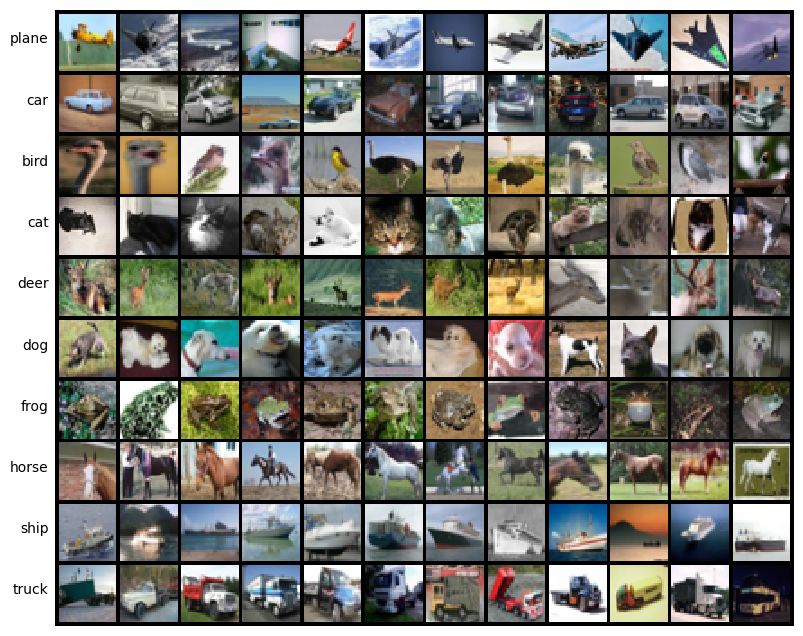

Train data shape:  torch.Size([47500, 3, 32, 32])
Train labels shape:  torch.Size([47500])
Validation data shape:  torch.Size([2500, 3, 32, 32])
Validation labels shape:  torch.Size([2500])
Test data shape:  torch.Size([10000, 3, 32, 32])
Test labels shape:  torch.Size([10000])


In [279]:
# Invoke the above function to get our data.
data_dict = get_CIFAR10_data(visualize=True)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

# Convolutional layer
As in the previous notebook, we will package each new neural network operator in a class that defines a `forward` and `backward` function.

In [280]:
class Conv(object):

  @staticmethod
  def forward(x, w, b, conv_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

## Convolutional layer: forward
The core of a convolutional network is the convolution operation. Implement the forward pass for the convolution layer in the function `Conv.forward`.

You don't have to worry too much about efficiency at this point; just write the code in whatever way you find most clear.

You can test your implementation by running the following:

In [281]:
def conv_forward(x, w, b, conv_param):
  """
  A naive implementation of the forward pass for a convolutional layer.
  The input consists of N data points, each with C channels, height H and
  width W. We convolve each input with F different filters, where each filter
  spans all C channels and has height HH and width WW.

  Input:
  - x: Input data of shape (N, C, H, W)
  - w: Filter weights of shape (F, C, HH, WW)
  - b: Biases, of shape (F,)
  - conv_param: A dictionary with the following keys:
    - 'stride': The number of pixels between adjacent receptive fields in the
    horizontal and vertical directions.
    - 'pad': The number of pixels that will be used to zero-pad the input.

  During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
  along the height and width axes of the input. Be careful not to modfiy the original
  input x directly.

  Returns a tuple of:
  - out: Output data, of shape (N, F, H', W') where H' and W' are given by
    H' = 1 + (H + 2 * pad - HH) / stride
    W' = 1 + (W + 2 * pad - WW) / stride
  - cache: (x, w, b, conv_param)
  """
  out = None
  ##############################################################################
  # TODO: Implement the convolutional forward pass.                            #
  # Hint: you can use the function torch.nn.functional.pad for padding.        #
  # Note that you are NOT allowed to use anything in torch.nn in other places. #
  ##############################################################################
  # Replace "pass" statement with your code
  pad = conv_param['pad']
  stride = conv_param['stride']
  pad_x = torch.nn.functional.pad(x,(pad,pad,pad,pad))
  N, C, H, W = pad_x.shape
  F, C, HH, WW = w.shape
  # print("H W HH WW",H,W,HH,WW)
  nh, nw = 1+(H-HH)//stride, 1+(W-WW)//stride
  out = torch.full((N,F,nh,nw),0,dtype=torch.float64)
  # print("pad_x shape", pad_x.shape)
  # print("b shape", b.shape)
  for idx in range(F):
    for h in range(0,H,stride):
      for j in range(0,W,stride):
        if h+HH>H or j+WW>W: break
        i1, i2 = h//stride, j//stride
        # print("i1= i2= h= j=",i1,i2,h,j)
        # print(pad_x[:,:,h:h+HH,j:j+WW].shape)
        # print(w[idx].shape)
        # print((torch.sum(pad_x[:,:,h:h+HH,j:j+WW]*w[idx], dim=[1,2,3])+b[idx]).shape)
        # print((torch.sum(pad_x[:,:,h:h+HH,j:j+WW]*w[idx], dim=[1,2,3])+b[idx]))
        out[0:N,idx,i1,i2] = torch.sum(pad_x[:,:,h:h+HH,j:j+WW]*w[idx], dim=[1,2,3])+b[idx]
  # print("final shape: ",out.shape)
  out = out.cuda()
  # print(out)
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = (x, w, b, conv_param)
  return out, cache

Conv.forward = conv_forward

After implementing the forward pass of the convolution operation, run the following to check your implementation. You should get a relative error less than `1e-7`.

In [282]:
x_shape = torch.tensor((2, 3, 4, 4))
w_shape = torch.tensor((3, 3, 4, 4))
x = torch.linspace(-0.1, 0.5, steps=torch.prod(x_shape), **to_double_cuda).reshape(*x_shape)
w = torch.linspace(-0.2, 0.3, steps=torch.prod(w_shape), **to_double_cuda).reshape(*w_shape)
b = torch.linspace(-0.1, 0.2, steps=3, **to_double_cuda)

conv_param = {'stride': 2, 'pad': 1}
out, _ = Conv.forward(x, w, b, conv_param)
correct_out = torch.tensor([[[[-0.08759809, -0.10987781],
                              [-0.18387192, -0.2109216 ]],
                             [[ 0.21027089,  0.21661097],
                              [ 0.22847626,  0.23004637]],
                             [[ 0.50813986,  0.54309974],
                              [ 0.64082444,  0.67101435]]],
                            [[[-0.98053589, -1.03143541],
                              [-1.19128892, -1.24695841]],
                             [[ 0.69108355,  0.66880383],
                              [ 0.59480972,  0.56776003]],
                             [[ 2.36270298,  2.36904306],
                              [ 2.38090835,  2.38247847]]]], **to_double_cuda)

# Compare your output to ours; difference should be around e-8
print('Testing Conv.forward')
print('difference: ', rel_error(out, correct_out))

Testing Conv.forward
difference:  4.424295217314395e-08


## Aside: Image processing via convolutions

As fun way to both check your implementation and gain a better understanding of the type of operation that convolutional layers can perform, we will set up an input containing two images and manually set up filters that perform common image processing operations (grayscale conversion and edge detection). The convolution forward pass will apply these operations to each of the input images. We can then visualize the results as a sanity check.

C:\Users\uqwq8\AppData\Local\Temp\ipykernel_23756\133326974.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten = imread(kitten_url)
C:\Users\uqwq8\AppData\Local\Temp\ipykernel_23756\133326974.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  puppy = imread(puppy_url)


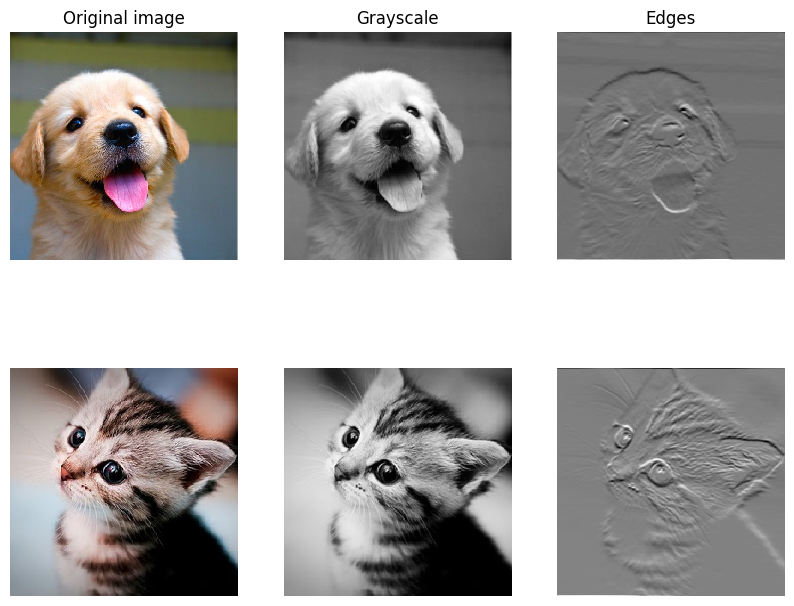

In [283]:
from imageio import imread
from PIL import Image
from torchvision.transforms import ToTensor

kitten_url = 'https://web.eecs.umich.edu/~justincj/teaching/eecs498/assets/a3/kitten.jpg'
puppy_url = 'https://web.eecs.umich.edu/~justincj/teaching/eecs498/assets/a3/puppy.jpg'

kitten = imread(kitten_url)
puppy = imread(puppy_url)
# kitten = kitten.to('cpu')
# puppy = puppy.to('cpu')
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :]

img_size = 200   # Make this smaller if it runs too slow
resized_puppy = ToTensor()(Image.fromarray(puppy).resize((img_size, img_size)))
resized_kitten = ToTensor()(Image.fromarray(kitten_cropped).resize((img_size, img_size)))
x = torch.stack([resized_puppy, resized_kitten])

# Set up a convolutional weights holding 2 filters, each 3x3
w = torch.zeros(2, 3, 3, 3, dtype=x.dtype)

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = torch.tensor([[0, 0, 0], [0, 0.3, 0], [0, 0, 0]])
w[0, 1, :, :] = torch.tensor([[0, 0, 0], [0, 0.6, 0], [0, 0, 0]])
w[0, 2, :, :] = torch.tensor([[0, 0, 0], [0, 0.1, 0], [0, 0, 0]])

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = torch.tensor([0, 128], dtype=x.dtype)

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = Conv.forward(x, w, b, {'stride': 1, 'pad': 1})

def imshow_no_ax(img, normalize=True):
  """ Tiny helper to show images as uint8 and remove axis labels """
  # img = img.cpu()
  if normalize:
    img_max, img_min = img.max(), img.min()
    img = 255.0 * (img - img_min) / (img_max - img_min)
  plt.imshow(img)
  plt.gca().axis('off')

# Show the original images and the results of the conv operation
out = out.cpu()
plt.subplot(2, 3, 1)
imshow_no_ax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_no_ax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_no_ax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_no_ax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_no_ax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_no_ax(out[1, 1])
plt.show()

## Convolutional layer: backward
Implement the backward pass for the convolution operation in the function `Conv.backward`. Again, you don't need to worry too much about computational efficiency.

In [284]:
def conv_backward(dout, cache):
  """
  A naive implementation of the backward pass for a convolutional layer.

  Inputs:
  - dout: Upstream derivatives.
  - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

  Returns a tuple of:
  - dx: Gradient with respect to x
  - dw: Gradient with respect to w
  - db: Gradient with respect to b
  """
  dx, dw, db = None, None, None
  #############################################################################
  # TODO: Implement the convolutional backward pass.                          #
  #############################################################################
  # Replace "pass" statement with your code
  x, w, b, conv_param = cache
  w = w.cuda()
  db = dout.sum(dim=[0,2,3])
  pad = conv_param['pad']
  stride = conv_param['stride']
  pad_x = torch.nn.functional.pad(x,(pad,pad,pad,pad)).cuda()
  dx, dw = torch.full(pad_x.shape,0,dtype=torch.float64), torch.full(w.shape,0,dtype=torch.float64)
  dx = dx.cuda()
  dw = dw.cuda()
  N, C, H, W = pad_x.shape
  F, C, HH, WW = w.shape
  for idx in range(F):
    for h in range(0,H,stride):
      for j in range(0,W,stride):
        if h+HH>H or j+WW>W: break
        i1, i2 = h//stride, j//stride # 贡献 out[0:N,idx,i1,i2]
        ddout = dout[:,idx,i1,i2].reshape(N,1,1,1).cuda()
        ww=w[idx].reshape(1,C,HH,WW).cuda()
        dx[:,:,h:h+HH,j:j+WW] += ww*ddout
        dw[idx] += torch.sum(pad_x[:,:,h:h+HH,j:j+WW]*ddout,dim=0)
  # print("bef dx shape",dx.shape)
  dx = torch.nn.functional.pad(dx,(-pad,-pad,-pad,-pad))
  # print("dx shape",dx.shape)

  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx, dw, db

Conv.backward = conv_backward

After implementing the convolution backward pass, run the following to test your implementation. You should get errors less than `1e-8`.

In [285]:
fix_random_seed(0)
x = torch.randn(4, 3, 5, 5, **to_double_cuda)
w = torch.randn(2, 3, 3, 3, **to_double_cuda)
b = torch.randn(2, **to_double_cuda)
dout = torch.randn(4, 2, 5, 5, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}

dx_num = compute_numeric_gradient(lambda x: Conv.forward(x, w, b, conv_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv.forward(x, w, b, conv_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv.forward(x, w, b, conv_param)[0], b, dout)

out, cache = Conv.forward(x, w, b, conv_param)
dx, dw, db = Conv.backward(dout, cache)

print('Testing Conv.backward function')
print('dx error: ', rel_error(dx, dx_num))
print('dw error: ', rel_error(dw, dw_num))
print('db error: ', rel_error(db, db_num))

Testing Conv.backward function
dx error:  9.701562019554127e-09
dw error:  7.9250895660697e-10
db error:  1.548052854665895e-10


# Max-pooling

In [286]:
class MaxPool(object):

  @staticmethod
  def forward(x, pool_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

## Max-pooling: forward
Implement the forward pass for the max-pooling operation. Again, don't worry too much about computational efficiency.

In [287]:
def max_pool_forward(x, pool_param):
  """
  A naive implementation of the forward pass for a max-pooling layer.

  Inputs:
  - x: Input data, of shape (N, C, H, W)
  - pool_param: dictionary with the following keys:
    - 'pool_height': The height of each pooling region
    - 'pool_width': The width of each pooling region
    - 'stride': The distance between adjacent pooling regions
  No padding is necessary here.

  Returns a tuple of:
  - out: Output data, of shape (N, C, H', W') where H' and W' are given by
    H' = 1 + (H - pool_height) / stride
    W' = 1 + (W - pool_width) / stride
  - cache: (x, pool_param)
  """
  out = None
  #############################################################################
  # TODO: Implement the max-pooling forward pass                              #
  #############################################################################
  # Replace "pass" statement with your code
  ph, pw = pool_param['pool_height'], pool_param['pool_width']
  stride = pool_param['stride']
  N, C, H, W = x.shape
  nh, nw = 1+(H-ph)//stride, 1+(W-pw)//stride
  out = torch.full((N,C,nh,nw),0,dtype=torch.float64).cuda()
  # print("out shape",out.shape)
  for h in range(0,H,stride):
    for j in range(0,W,stride):
      if h+ph>H or j+pw>W: break
      for n in range(N):
        for c in range(C):
          i1, i2 = h//stride, j//stride # 贡献 out[0:N,idx,i1,i2]
          # print(x[n,c,h:h+ph,j:j+pw].flatten().shape)
          # print("n,c,i1,i2",n,c,i1,i2)
          # print("max=",torch.max(x[n,c,h:h+ph,j:j+pw].flatten()))
          out[n,c,i1,i2] = torch.max(x[n,c,h:h+ph,j:j+pw])

  # N, C, H, W = x.shape
  # HH, WW = pool_param['pool_height'], pool_param['pool_width']
  # stride = pool_param['stride']
  
  # H_out = 1 + (H - HH) // stride
  # W_out = 1 + (W - WW) // stride
  
  # out = torch.zeros((N, C, H_out, W_out), device=x.device, dtype=x.dtype)
  # for img in range(N):
  #   for channel in range(C):
  #     for i in range(H_out):
  #       for j in range(W_out):
  #         out[img, channel, i, j] = \
  #           torch.max(x[img, channel, i*stride:i*stride+HH, j*stride:j*stride+WW])
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  cache = (x, pool_param)
  return out, cache
MaxPool.forward = max_pool_forward

After implementing the forward pass for max-pooling, run the following to check your implementation. You should get errors less than `1e-7`.

In [288]:
x_shape = torch.tensor((2, 3, 4, 4))
x = torch.linspace(-0.3, 0.4, steps=torch.prod(x_shape), **to_double_cuda).reshape(*x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = MaxPool.forward(x, pool_param)

correct_out = torch.tensor([[[[-0.26315789, -0.24842105],
                              [-0.20421053, -0.18947368]],
                             [[-0.14526316, -0.13052632],
                              [-0.08631579, -0.07157895]],
                             [[-0.02736842, -0.01263158],
                              [ 0.03157895,  0.04631579]]],
                            [[[ 0.09052632,  0.10526316],
                              [ 0.14947368,  0.16421053]],
                             [[ 0.20842105,  0.22315789],
                              [ 0.26736842,  0.28210526]],
                             [[ 0.32631579,  0.34105263],
                              [ 0.38526316,  0.4       ]]]], **to_double_cuda)

# Compare your output with ours. Difference should be on the order of e-8.
print('Testing MaxPool.forward function:')
print('difference: ', rel_error(out, correct_out))

Testing MaxPool.forward function:
difference:  8.333332667751512e-08


## Max-pooling: backward
Implement the backward pass for the max-pooling operation. You don't need to worry about computational efficiency.

In [289]:
def max_pool_backward(dout, cache):
  """
  A naive implementation of the backward pass for a max-pooling layer.
  Inputs:
  - dout: Upstream derivatives
  - cache: A tuple of (x, pool_param) as in the forward pass.
  Returns:
  - dx: Gradient with respect to x
  """
  dx = None
  #############################################################################
  # TODO: Implement the max-pooling backward pass                             #
  #############################################################################
  # Replace "pass" statement with your code
  x, pool_param = cache
  ph, pw = pool_param['pool_height'], pool_param['pool_width']
  stride = pool_param['stride']
  N, C, H, W = x.shape
  nh, nw = 1+(H-ph)//stride, 1+(W-pw)//stride
  dx = torch.full(x.shape,0,dtype=torch.float64).cuda()
  for h in range(0,H,stride):
    for j in range(0,W,stride):
      if h+ph>H or j+pw>W: break
      for n in range(N):
        for c in range(C):
          i1, i2 = h//stride, j//stride # 贡献 out[n,c,i1,i2]
          # print(x[n,c,h:h+ph,j:j+pw].flatten().shape)
          # print("n,c,i1,i2",n,c,i1,i2)
          # print("max=",torch.max(x[n,c,h:h+ph,j:j+pw].flatten()))
          idx = torch.max(x[n,c,h:h+ph,j:j+pw].flatten(),0)[1]
          dh, dj = idx//ph, idx%pw
          dx[n,c,h+dh,j+dj] = dout[n,c,i1,i2]
  # x, pool_param = cache # 优雅写法
  # N, C, H, W = x.shape
  # HH, WW = pool_param['pool_height'], pool_param['pool_width']
  # stride = pool_param['stride']
  # _, _, H_out, W_out = dout.shape
  # dx = torch.zeros_like(x)
  
  # for img in range(N):
  #   for c in range(C):
  #     for i in range(H_out):
  #       for j in range(W_out):
  #         img_window = x[img, c, i*stride:i*stride+HH, j*stride:j*stride+WW]
  #         max_idx = torch.argmax(img_window)
  #         row = max_idx // img_window.shape[0]
  #         column = max_idx % img_window.shape[1]
  #         dx[img, c, i*stride:i*stride+HH, j*stride:j*stride+WW][row, column] = dout[img, c, i, j]
  #############################################################################
  #                              END OF YOUR CODE                             #
  #############################################################################
  return dx

MaxPool.backward = max_pool_backward

Check your implementation of the max pooling backward pass with numeric gradient checking by running the following. You should get errors less than `1e-10`.

In [290]:
fix_random_seed(0)
x = torch.randn(3, 2, 8, 8, **to_double_cuda)
dout = torch.randn(3, 2, 4, 4, **to_double_cuda)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = compute_numeric_gradient(lambda x: MaxPool.forward(x, pool_param)[0], x, dout)

out, cache = MaxPool.forward(x, pool_param)
dx = MaxPool.backward(dout, cache)

print('Testing MaxPool.backward function:')
print('dx error: ', rel_error(dx, dx_num))

Testing MaxPool.backward function:
dx error:  6.551073432532464e-12


# Fast layers
Making convolution and pooling layers fast can be challenging. To spare you the pain, we've provided fast implementations of the forward and backward passes for convolution and pooling layers.

The fast convolution implementation depends on `torch.nn`

The API for the fast versions of the convolution and pooling layers is exactly the same as the naive versions that you implemented above: the forward pass receives data, weights, and parameters and produces outputs and a cache object; the backward pass recieves upstream derivatives and the cache object and produces gradients with respect to the data and weights.

You can compare the performance of the naive and fast versions of these layers by running the following:

In [291]:
class FastConv(object):

  @staticmethod
  def forward(x, w, b, conv_param):
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape
    stride, pad = conv_param['stride'], conv_param['pad']
    layer = torch.nn.Conv2d(C, F, (HH, WW), stride=stride, padding=pad)
    layer.weight = torch.nn.Parameter(w)
    layer.bias = torch.nn.Parameter(b)
    tx = x.detach()
    tx.requires_grad = True
    out = layer(tx)
    cache = (x, w, b, conv_param, tx, out, layer)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    try:
      x, _, _, _, tx, out, layer = cache
      out.backward(dout)
      dx = tx.grad.detach()
      dw = layer.weight.grad.detach()
      db = layer.bias.grad.detach()
      layer.weight.grad = layer.bias.grad = None
    except RuntimeError:
      dx, dw, db = torch.zeros_like(tx), torch.zeros_like(layer.weight), torch.zeros_like(layer.bias)
    return dx, dw, db


class FastMaxPool(object):

  @staticmethod
  def forward(x, pool_param):
    N, C, H, W = x.shape
    pool_height, pool_width = pool_param['pool_height'], pool_param['pool_width']
    stride = pool_param['stride']
    layer = torch.nn.MaxPool2d(kernel_size=(pool_height, pool_width), stride=stride)
    tx = x.detach()
    tx.requires_grad = True
    out = layer(tx)
    cache = (x, pool_param, tx, out, layer)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    try:
      x, _, tx, out, layer = cache
      out.backward(dout)
      dx = tx.grad.detach()
    except RuntimeError:
      dx = torch.zeros_like(tx)
    return dx

We will now compare three different implementations of convolution (both forward and backward):

1. Your naive, non-vectorized implementation on CPU
2. The fast, vectorized implementation on CPU
3. The fast, vectorized implementation on GPU

The differences between your implementation and FastConv should be less than `1e-10`. When moving from your implementation to FastConv CPU, you will likely see speedups of at least 100x. When comparing your implementation to FastConv CUDA, you will likely see speedups of more than 500x. (These speedups are not hard requirements for this assignment since we are not asking you to write any vectorized implementations)

In [292]:
# Rel errors should be around e-11 or less
fix_random_seed(0)
x = torch.randn(10, 3, 31, 31, **to_double)
w = torch.randn(25, 3, 3, 3, **to_double)
b = torch.randn(25, **to_double)
dout = torch.randn(10, 25, 16, 16, **to_double)
x_cuda, w_cuda, b_cuda, dout_cuda = x.to('cuda'), w.to('cuda'), b.to('cuda'), dout.to('cuda')
conv_param = {'stride': 2, 'pad': 1}

t0 = time.time()
out_naive, cache_naive = Conv.forward(x, w, b, conv_param)
out_naive = out_naive.cpu()
t1 = time.time()
out_fast, cache_fast = FastConv.forward(x, w, b, conv_param)
t2 = time.time()
out_fast_cuda, cache_fast_cuda = FastConv.forward(x_cuda, w_cuda, b_cuda, conv_param)
t3 = time.time()
eps = 1e-9

print('Testing FastConv.forward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1 + eps)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2 + eps)))
print('Difference: ', rel_error(out_naive, out_fast))
print('Difference CUDA: ', rel_error(out_naive, out_fast_cuda.to(out_naive.device)))

t0 = time.time()
dx_naive, dw_naive, db_naive = Conv.backward(dout, cache_naive)
t1 = time.time()
dx_fast, dw_fast, db_fast = FastConv.backward(dout, cache_fast)
t2 = time.time()
dx_fast_cuda, dw_fast_cuda, db_fast_cuda = FastConv.backward(dout_cuda, cache_fast_cuda)
t3 = time.time()

print('\nTesting FastConv.backward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1 + eps)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2 + eps)))
dx_naive = dx_naive.cpu()
dw_naive = dw_naive.cpu()
db_naive = db_naive.cpu()
print('dx difference: ', rel_error(dx_naive, dx_fast))
print('dw difference: ', rel_error(dw_naive, dw_fast))
print('db difference: ', rel_error(db_naive, db_fast))
print('dx difference CUDA: ', rel_error(dx_naive, dx_fast_cuda.to(dx_naive.device)))
print('dw difference CUDA: ', rel_error(dw_naive, dw_fast_cuda.to(dw_naive.device)))
print('db difference CUDA: ', rel_error(db_naive, db_fast_cuda.to(db_naive.device)))

Testing FastConv.forward:
Naive: 0.222578s
Fast: 0.001003s
Fast CUDA: 0.001995s
Speedup: 221.853391x
Speedup CUDA: 111.589712x
Difference:  2.8422883165036553e-11
Difference CUDA:  3.161322032186107e-11

Testing FastConv.backward:
Naive: 1.025926s
Fast: 0.002010s
Fast CUDA: 0.000996s
Speedup: 510.504669x
Speedup CUDA: 1029.682144x
dx difference:  1.0335428835507662e-12
dw difference:  1.4017678695610868e-13
db difference:  0.0
dx difference CUDA:  1.0335428835507662e-12
dw difference CUDA:  1.322269350847427e-13
db difference CUDA:  2.4702623497124452e-15


We will now similarly compare your naive implementation of max pooling against the fast implementation. You should see differences of 0 between your implementation and the fast implementation.

When comparing your implementation against FastMaxPool on CPU, you will likely see speedups of more than 100x. When comparing your implementation against FastMaxPool on GPU, you will likely see speedups of more than 500x.

In [293]:
# Relative errors should be close to 0.0
fix_random_seed(0)
x = torch.randn(40, 3, 32, 32, **to_double)
dout = torch.randn(40, 3, 16, 16, **to_double)
x_cuda, dout_cuda = x.to('cuda'), dout.to('cuda')
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

t0 = time.time()
out_naive, cache_naive = MaxPool.forward(x, pool_param)
out_naive = out_naive.cpu()
t1 = time.time()
out_fast, cache_fast = FastMaxPool.forward(x, pool_param)
t2 = time.time()
out_fast_cuda, cache_fast_cuda = FastMaxPool.forward(x_cuda, pool_param)
t3 = time.time()

print('Testing FastMaxPool.forward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1 + eps)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2 + eps)))
print('Difference: ', rel_error(out_naive, out_fast))
print('Difference CUDA: ', rel_error(out_naive, out_fast_cuda.to(out_naive.device)))

t0 = time.time()
dx_naive = MaxPool.backward(dout, cache_naive)
dx_naive = dx_naive.cpu()
t1 = time.time()
dx_fast = FastMaxPool.backward(dout, cache_fast)
t2 = time.time()
dx_fast_cuda = FastMaxPool.backward(dout_cuda, cache_fast_cuda)
t3 = time.time()

print('\nTesting FastMaxPool.backward:')
print('Naive: %fs' % (t1 - t0))
print('Fast: %fs' % (t2 - t1))
print('Fast CUDA: %fs' % (t3 - t2))
print('Speedup: %fx' % ((t1 - t0) / (t2 - t1 + eps)))
print('Speedup CUDA: %fx' % ((t1 - t0) / (t3 - t2 + eps)))
print('dx difference: ', rel_error(dx_naive, dx_fast))
print('dx difference CUDA: ', rel_error(dx_naive, dx_fast_cuda.to(dx_naive.device)))

Testing FastMaxPool.forward:
Naive: 1.098317s
Fast: 0.000000s
Fast CUDA: 0.001002s
Speedup: 1098316669.464111x
Speedup CUDA: 1096.303999x
Difference:  0.0
Difference CUDA:  0.0

Testing FastMaxPool.backward:
Naive: 2.339674s
Fast: 0.000999s
Fast CUDA: 0.000000s
Speedup: 2340.957581x
Speedup CUDA: 2339673995.971680x
dx difference:  0.0
dx difference CUDA:  0.0


# Convolutional "sandwich" layers
Previously we introduced the concept of "sandwich" layers that combine multiple operations into commonly used patterns. Below you will find sandwich layers that implement a few commonly used patterns for convolutional networks. Run the cells below to sanity check they're working.

In [294]:
class Conv_ReLU(object):

  @staticmethod
  def forward(x, w, b, conv_param):
    """
    A convenience layer that performs a convolution followed by a ReLU.
    Inputs:
    - x: Input to the convolutional layer
    - w, b, conv_param: Weights and parameters for the convolutional layer
    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    out, relu_cache = ReLU.forward(a)
    cache = (conv_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the conv-relu convenience layer.
    """
    conv_cache, relu_cache = cache
    da = ReLU.backward(dout, relu_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db


class Conv_ReLU_Pool(object):

  @staticmethod
  def forward(x, w, b, conv_param, pool_param):
    """
    A convenience layer that performs a convolution, a ReLU, and a pool.
    Inputs:
    - x: Input to the convolutional layer
    - w, b, conv_param: Weights and parameters for the convolutional layer
    - pool_param: Parameters for the pooling layer
    Returns a tuple of:
    - out: Output from the pooling layer
    - cache: Object to give to the backward pass
    """
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    s, relu_cache = ReLU.forward(a)
    out, pool_cache = FastMaxPool.forward(s, pool_param)
    cache = (conv_cache, relu_cache, pool_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the conv-relu-pool convenience layer
    """
    conv_cache, relu_cache, pool_cache = cache
    ds = FastMaxPool.backward(dout, pool_cache)
    da = ReLU.backward(ds, relu_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db

Test the implementations of the sandwich layers by running the following. You should see errors less than `1e-7`.

In [295]:
fix_random_seed(0)
x = torch.randn(2, 3, 16, 16, **to_double_cuda)
w = torch.randn(3, 3, 3, 3, **to_double_cuda)
b = torch.randn(3, **to_double_cuda)
dout = torch.randn(2, 3, 8, 8, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

out, cache = Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)
dx, dw, db = Conv_ReLU_Pool.backward(dout, cache)

dx_num = compute_numeric_gradient(lambda x: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv_ReLU_Pool.forward(x, w, b, conv_param, pool_param)[0], b, dout)

# Relative errors should be around e-8 or less
print('Testing Conv_ReLU_Pool')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing Conv_ReLU_Pool
dx error:  2.1330122380471704e-08
dw error:  2.4734311581754782e-09
db error:  3.3151358144220166e-11


In [296]:
fix_random_seed(0)
x = torch.randn(2, 3, 8, 8, **to_double_cuda)
w = torch.randn(3, 3, 3, 3, **to_double_cuda)
b = torch.randn(3, **to_double_cuda)
dout = torch.randn(2, 3, 8, 8, **to_double_cuda)
conv_param = {'stride': 1, 'pad': 1}

out, cache = Conv_ReLU.forward(x, w, b, conv_param)
dx, dw, db = Conv_ReLU.backward(dout, cache)

dx_num = compute_numeric_gradient(lambda x: Conv_ReLU.forward(x, w, b, conv_param)[0], x, dout)
dw_num = compute_numeric_gradient(lambda w: Conv_ReLU.forward(x, w, b, conv_param)[0], w, dout)
db_num = compute_numeric_gradient(lambda b: Conv_ReLU.forward(x, w, b, conv_param)[0], b, dout)

# Relative errors should be around e-8 or less
print('Testing Conv_ReLU:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing Conv_ReLU:
dx error:  2.601398652480065e-08
dw error:  7.92210040099351e-10
db error:  1.7982331735850437e-10


# Three-layer convolutional network
Now that you have implemented all the necessary layers, we can put them together into a simple convolutional network.

Complete the implementation of the `ThreeLayerConvNet` class. We STRONGLY recommend you to use the fast/sandwich layers (already imported for you) in your implementation. Run the following cells to help you debug:

In [297]:
class ThreeLayerConvNet(object):
  """
  A three-layer convolutional network with the following architecture:
  conv - relu - 2x2 max pool - linear - relu - linear - softmax
  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """

  def __init__(self, input_dims=(3, 32, 32), num_filters=32, filter_size=7,
         hidden_dim=100, num_classes=10, weight_scale=1e-3, reg=0.0,
         dtype=torch.float, device='cpu'):
    """
    Initialize a new network.
    Inputs:
    - input_dims: Tuple (C, H, W) giving size of input data
    - num_filters: Number of filters to use in the convolutional layer
    - filter_size: Width/height of filters to use in the convolutional layer
    - hidden_dim: Number of units to use in the fully-connected hidden layer
    - num_classes: Number of scores to produce from the final linear layer.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights.
    - reg: Scalar giving L2 regularization strength
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'
    """
    self.params = {}
    self.reg = reg
    self.dtype = dtype

    ############################################################################
    # TODO: Initialize weights and biases for the three-layer convolutional    #
    # network. Weights should be initialized from a Gaussian centered at 0.0   #
    # with standard deviation equal to weight_scale; biases should be          #
    # initialized to zero. All weights and biases should be stored in the      #
    #  dictionary self.params. Store weights and biases for the convolutional  #
    # layer using the keys 'W1' and 'b1'; use keys 'W2' and 'b2' for the       #
    # weights and biases of the hidden linear layer, and keys 'W3' and 'b3'    #
    # for the weights and biases of the output linear layer.                   #
    #                                                                          #
    # IMPORTANT: For this assignment, you can assume that the padding          #
    # and stride of the first convolutional layer are chosen so that           #
    # **the width and height of the input are preserved**. Take a look at      #
    # the start of the loss() function to see how that happens.                #
    ############################################################################
    # Replace "pass" statement with your code
    # Conv-ReLU-pool + Linear-Relu + Linear
    C, H, W = input_dims
    F, S = num_filters, filter_size
    nH, nW = H//2, W//2
    self.params['W1'] = weight_scale * torch.randn((F, C, S, S), device=device, dtype=dtype)
    self.params['b1'] = torch.zeros(F, device=device, dtype=dtype)
    self.params['W2'] = weight_scale * torch.randn(F*nH*nW, hidden_dim, device=device, dtype=dtype)
    self.params['b2'] = torch.zeros(hidden_dim, device=device, dtype=dtype)
    self.params['W3'] = weight_scale * torch.randn(hidden_dim, num_classes, device=device, dtype=dtype)
    self.params['b3'] = torch.zeros(num_classes, device=device, dtype=dtype)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################


  def loss(self, X, y=None):
    """
    Evaluate loss and gradient for the three-layer convolutional network.
    Input / output: Same API as TwoLayerNet.
    """
    X = X.to(self.dtype)
    W1, b1 = self.params['W1'], self.params['b1']
    W2, b2 = self.params['W2'], self.params['b2']
    W3, b3 = self.params['W3'], self.params['b3']

    # pass conv_param to the forward pass for the convolutional layer
    # Padding and stride chosen to preserve the input spatial size
    filter_size = W1.shape[2]
    conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}

    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the three-layer convolutional net,  #
    # computing the class scores for X and storing them in the scores          #
    # variable.                                                                #
    #                                                                          #
    # Remember you can use the functions defined in your implementation above. #
    ############################################################################
    # Replace "pass" statement with your code
    # Conv-ReLU-pool + Linear-Relu + Linear
    out1, cache1 = Conv_ReLU_Pool.forward(X,W1,b1,conv_param,pool_param)
    N, F, nH, nW = out1.shape
    out2, cache2 = Linear_ReLU.forward(out1.reshape(N,F*nH*nW),W2,b2)
    scores, cache3 = Linear.forward(out2,W3,b3)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    if y is None:
      return scores

    loss, grads = 0.0, {}
    ############################################################################
    # TODO: Implement the backward pass for the three-layer convolutional net, #
    # storing the loss and gradients in the loss and grads variables. Compute  #
    # data loss using softmax, and make sure that grads[k] holds the gradients #
    # for self.params[k]. Don't forget to add L2 regularization!               #
    #                                                                          #
    # NOTE: To ensure that your implementation matches ours and you pass the   #
    # automated tests, make sure that your L2 regularization does not include  #
    # a factor of 0.5                                                          #
    ############################################################################
    # Replace "pass" statement with your code
    loss, ds = softmax_loss(scores,y)
    loss += self.reg*torch.sum(W1*W1) + self.reg*torch.sum(W2*W2) + self.reg*torch.sum(W3*W3) 
    dh, dW3, db3 = Linear.backward(ds,cache3)
    dfx, dW2, db2 = Linear_ReLU.backward(dh,cache2)
    dfx = dfx.reshape(N,F,nH,nW)
    dX, dW1, db1 = Conv_ReLU_Pool.backward(dfx,cache1)
    dW3 += 2*self.reg*self.params['W3']
    dW2 += 2*self.reg*self.params['W2']
    dW1 += 2*self.reg*self.params['W1']
    grads['b3'] = db3
    grads['W3'] = dW3
    grads['b2'] = db2
    grads['W2'] = dW2
    grads['b1'] = db1
    grads['W1'] = dW1 
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    return loss, grads

## Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization the loss should go up slightly.

In [298]:
fix_random_seed(0)
model = ThreeLayerConvNet(**to_double_cuda)

N = 50
X = torch.randn(N, 3, 32, 32, **to_double_cuda)
y = torch.randint(10, size=(N,), **to_long_cuda)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss.item())

model.reg = 0.5
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss.item())

Initial loss (no regularization):  2.3025858044660867
Initial loss (with regularization):  2.7149514488659885


## Gradient check
After the loss looks reasonable, use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artificial data and a small number of neurons at each layer.

You should see errors less than `1e-5`.

In [299]:
num_inputs = 2
input_dims = (3, 16, 16)
reg = 0.0
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dims=input_dims, hidden_dim=7,
                          weight_scale=5e-2, **to_double_cuda)
loss, grads = model.loss(X, y)

for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = compute_numeric_gradient(f, model.params[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 2.941824e-07
W2 max relative error: 3.446385e-06
W3 max relative error: 1.387975e-09
b1 max relative error: 4.690887e-09
b2 max relative error: 3.954465e-09
b3 max relative error: 2.169956e-10


## Overfit small data
A nice trick is to train your model with just a few training samples. You should be able to overfit small datasets, which will result in very high training accuracy and comparatively low validation accuracy.

In [300]:
fix_random_seed(0)

num_train = 100
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-3, **to_float_cuda)

solver = Solver(model, small_data,
                num_epochs=30, batch_size=50,
                update_rule=adam,
                optim_config={
                  'learning_rate': 2e-3,
                },
                verbose=True, print_every=1,
                device='cuda')
solver.train()

(Time 0.01 sec; Iteration 1 / 60) loss: 2.302585
(Epoch 0 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.04 sec; Iteration 2 / 60) loss: 2.300581
(Epoch 1 / 30) train acc: 0.170000; val_acc: 0.098800
(Time 0.06 sec; Iteration 3 / 60) loss: 2.289174
(Time 0.06 sec; Iteration 4 / 60) loss: 2.248582
(Epoch 2 / 30) train acc: 0.160000; val_acc: 0.098800
(Time 0.08 sec; Iteration 5 / 60) loss: 2.209397
(Time 0.08 sec; Iteration 6 / 60) loss: 2.201327
(Epoch 3 / 30) train acc: 0.160000; val_acc: 0.096400
(Time 0.10 sec; Iteration 7 / 60) loss: 2.194942
(Time 0.11 sec; Iteration 8 / 60) loss: 2.083840
(Epoch 4 / 30) train acc: 0.190000; val_acc: 0.132800
(Time 0.13 sec; Iteration 9 / 60) loss: 2.163818
(Time 0.13 sec; Iteration 10 / 60) loss: 2.083542
(Epoch 5 / 30) train acc: 0.240000; val_acc: 0.129600
(Time 0.15 sec; Iteration 11 / 60) loss: 2.078075
(Time 0.16 sec; Iteration 12 / 60) loss: 2.026791
(Epoch 6 / 30) train acc: 0.260000; val_acc: 0.132400
(Time 0.17 sec; Iteration 13 / 

Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

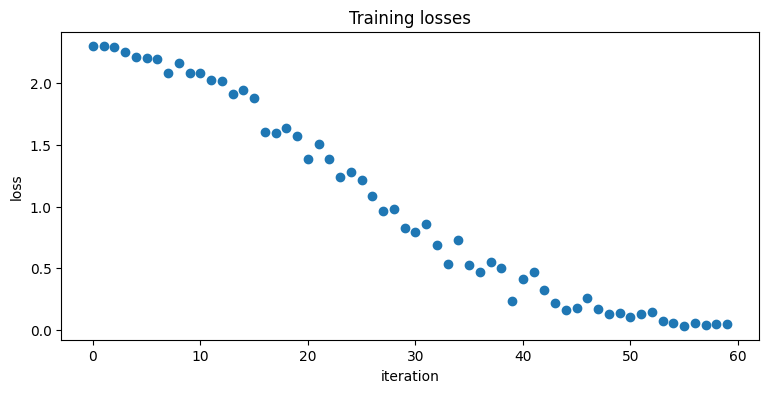

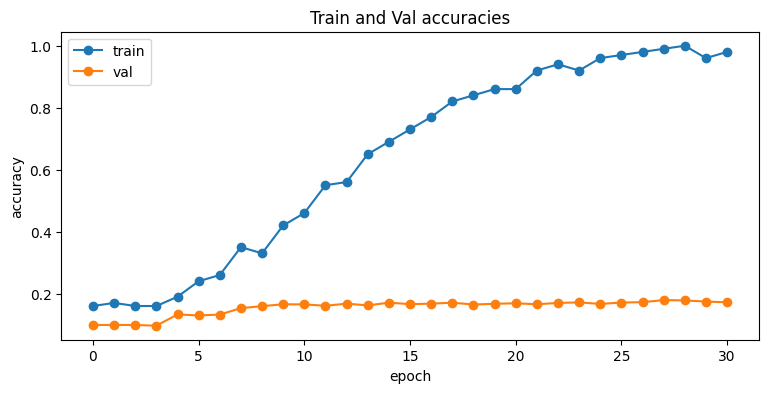

In [301]:
plt.title('Training losses')
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.gcf().set_size_inches(9, 4)
plt.show()

plt.title('Train and Val accuracies')
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.gcf().set_size_inches(9, 4)
plt.show()

## Train the net
By training the three-layer convolutional network for one epoch, you should achieve greater than 50% accuracy on the training set:

In [302]:
fix_random_seed(0)

model = ThreeLayerConvNet(weight_scale=0.001, hidden_dim=500, reg=0.001, dtype=torch.float, device='cuda')

solver = Solver(model, data_dict,
                num_epochs=1, batch_size=64,
                update_rule=adam,
                optim_config={
                  'learning_rate': 2e-3,
                },
                verbose=True, print_every=50, device='cuda')
solver.train()

(Time 0.01 sec; Iteration 1 / 742) loss: 2.306691
(Epoch 0 / 1) train acc: 0.110000; val_acc: 0.113600
(Time 0.45 sec; Iteration 51 / 742) loss: 1.976856
(Time 0.81 sec; Iteration 101 / 742) loss: 1.868419
(Time 1.18 sec; Iteration 151 / 742) loss: 1.801722
(Time 1.56 sec; Iteration 201 / 742) loss: 1.712420
(Time 1.91 sec; Iteration 251 / 742) loss: 1.642997
(Time 2.27 sec; Iteration 301 / 742) loss: 1.512745
(Time 2.62 sec; Iteration 351 / 742) loss: 1.642603
(Time 2.97 sec; Iteration 401 / 742) loss: 1.530343
(Time 3.32 sec; Iteration 451 / 742) loss: 1.704510
(Time 3.68 sec; Iteration 501 / 742) loss: 1.333781
(Time 4.03 sec; Iteration 551 / 742) loss: 1.750001
(Time 4.39 sec; Iteration 601 / 742) loss: 1.654572
(Time 4.76 sec; Iteration 651 / 742) loss: 1.765564
(Time 5.11 sec; Iteration 701 / 742) loss: 1.706918
(Epoch 1 / 1) train acc: 0.532000; val_acc: 0.520400


## Visualize Filters
You can visualize the first-layer convolutional filters from the trained network by running the following:

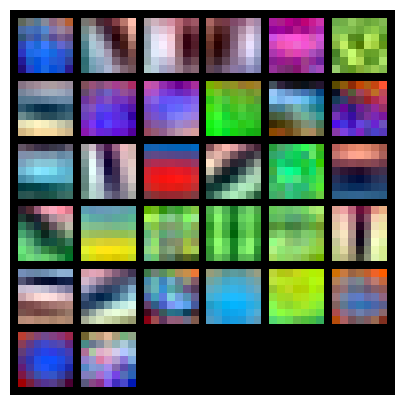

In [303]:
from torchvision.utils import make_grid
nrow = math.ceil(math.sqrt(model.params['W1'].shape[0]))
grid = make_grid(model.params['W1'], nrow=nrow, padding=1, normalize=True, scale_each=True)
plt.imshow(grid.to(device='cpu').permute(1, 2, 0))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

# Deep convolutional network
Next you will implement a deep convolutional network with an arbitrary number of conv layers in VGGNet style.

Read through the `DeepConvNet` class.

Implement the initialization, the forward pass, and the backward pass. For the moment don't worry about implementing batch normalization; we will add those features soon. Again, we STRONGLY recommend you to use the fast/sandwich layers (already imported for you) in your implementation.

In [ ]:
class DeepConvNet(object):
  """
  A convolutional neural network with an arbitrary number of convolutional
  layers in VGG-Net style. All convolution layers will use kernel size 3 and
  padding 1 to preserve the feature map size, and all pooling layers will be
  max pooling layers with 2x2 receptive fields and a stride of 2 to halve the
  size of the feature map.

  The network will have the following architecture:

  {conv - [batchnorm?] - relu - [pool?]} x (L - 1) - linear

  Each {...} structure is a "macro layer" consisting of a convolution layer,
  an optional batch normalization layer, a ReLU nonlinearity, and an optional
  pooling layer. After L-1 such macro layers, a single fully-connected layer
  is used to predict the class scores.

  The network operates on minibatches of data that have shape (N, C, H, W)
  consisting of N images, each with height H and width W and with C input
  channels.
  """
  def __init__(self, input_dims=(3, 32, 32),
               num_filters=[8, 8, 8, 8, 8],
               max_pools=[0, 1, 2, 3, 4],
               batchnorm=False,
               num_classes=10, weight_scale=1e-3, reg=0.0,
               weight_initializer=None,
               dtype=torch.float, device='cpu'):
    """
    Initialize a new network.

    Inputs:
    - input_dims: Tuple (C, H, W) giving size of input data
    - num_filters: List of length (L - 1) giving the number of convolutional
      filters to use in each macro layer.
    - max_pools: List of integers giving the indices of the macro layers that
      should have max pooling (zero-indexed).
    - batchnorm: Whether to include batch normalization in each macro layer
    - num_classes: Number of scores to produce from the final linear layer.
    - weight_scale: Scalar giving standard deviation for random initialization
      of weights, or the string "kaiming" to use Kaiming initialization instead
    - reg: Scalar giving L2 regularization strength. L2 regularization should
      only be applied to convolutional and fully-connected weight matrices;
      it should not be applied to biases or to batchnorm scale and shifts.
    - dtype: A torch data type object; all computations will be performed using
      this datatype. float is faster but less accurate, so you should use
      double for numeric gradient checking.
    - device: device to use for computation. 'cpu' or 'cuda'
    """
    self.params = {}
    self.num_layers = len(num_filters)+1
    self.max_pools = max_pools
    self.batchnorm = batchnorm
    self.reg = reg
    self.dtype = dtype

    if device == 'cuda':
      device = 'cuda:0'

    ############################################################################
    # TODO: Initialize the parameters for the DeepConvNet. All weights,        #
    # biases, and batchnorm scale and shift parameters should be stored in the #
    # dictionary self.params.                                                  #
    #                                                                          #
    # Weights for conv and fully-connected layers should be initialized        #
    # according to weight_scale. Biases should be initialized to zero.         #
    # Batchnorm scale (gamma) and shift (beta) parameters should be initilized #
    # to ones and zeros respectively.                                          #
    ############################################################################
    # Replace "pass" statement with your code
    bef, H, W = input_dims # bef = before channel num
    Fs = num_filters
    S = 3 # filter size
    L = self.num_layers
    for i in range(L-1):
      if weight_scale == 'kaiming':
        self.params['W'+str(i+1)] = kaiming_initializer(Fs[i],bef,S,device=device, dtype=dtype)
      else:
        self.params['W'+str(i+1)] = weight_scale * torch.randn((Fs[i], bef, S, S), device=device, dtype=dtype)
      self.params['b'+str(i+1)] = torch.zeros(Fs[i], device=device, dtype=dtype)
      bef = Fs[i]
      if batchnorm != False:
        self.params['gamma'+str(i+1)] = torch.ones(Fs[i], device=device, dtype=dtype)
        self.params['beta'+str(i+1)] = torch.zeros(Fs[i], device=device, dtype=dtype)
    num = len(max_pools)
    nH, nW = H//(2**(num)), W//(2**(num))
    if weight_scale == 'kaiming':
      self.params['W'+str(L)] = kaiming_initializer(Fs[-1]*nH*nW,num_classes, relu=False, device=device, dtype=dtype)
    else:  
      self.params['W'+str(L)] = weight_scale * torch.randn(Fs[-1]*nH*nW, num_classes, device=device, dtype=dtype)
    self.params['b'+str(L)] = torch.zeros(num_classes, device=device, dtype=dtype)

    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    # With batch normalization we need to keep track of running means and
    # variances, so we need to pass a special bn_param object to each batch
    # normalization layer. You should pass self.bn_params[0] to the forward pass
    # of the first batch normalization layer, self.bn_params[1] to the forward
    # pass of the second batch normalization layer, etc.
    self.bn_params = []
    if self.batchnorm:
      self.bn_params = [{'mode': 'train'} for _ in range(len(num_filters))]

    # Check that we got the right number of parameters
    if not self.batchnorm:
      params_per_macro_layer = 2  # weight and bias
    else:
      params_per_macro_layer = 4  # weight, bias, scale, shift
    num_params = params_per_macro_layer * len(num_filters) + 2
    msg = 'self.params has the wrong number of elements. Got %d; expected %d'
    msg = msg % (len(self.params), num_params)
    assert len(self.params) == num_params, msg

    # Check that all parameters have the correct device and dtype:
    for k, param in self.params.items():
      msg = 'param "%s" has device %r; should be %r' % (k, param.device, device)
      assert param.device == torch.device(device), msg
      msg = 'param "%s" has dtype %r; should be %r' % (k, param.dtype, dtype)
      assert param.dtype == dtype, msg

  def loss(self, X, y=None):
    """
    Evaluate loss and gradient for the deep convolutional network.
    Input / output: Same API as ThreeLayerConvNet.
    """
    X = X.to(self.dtype)
    mode = 'test' if y is None else 'train'

    # Set train/test mode for batchnorm params since they
    # behave differently during training and testing.
    if self.batchnorm:
      for bn_param in self.bn_params:
        bn_param['mode'] = mode
    scores = None

    # pass conv_param to the forward pass for the convolutional layer
    # Padding and stride chosen to preserve the input spatial size
    filter_size = 3
    conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}

    # pass pool_param to the forward pass for the max-pooling layer
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    scores = None
    ############################################################################
    # TODO: Implement the forward pass for the DeepConvNet, computing the      #
    # class scores for X and storing them in the scores variable.              #
    #                                                                          #
    # You should use the fast versions of convolution and max pooling layers,  #
    # or the convolutional sandwich layers, to simplify your implementation.   #
    ############################################################################
    # Replace "pass" statement with your code
    L, h = self.num_layers, X
    caches = []
    max_pool_set = set()
    for p in self.max_pools:
      max_pool_set.add(p)
    for i in range(1,L): # Layer 1 ~ L-1
      w, b = self.params['W'+str(i)], self.params['b'+str(i)]
      ci = None
      if i-1 in max_pool_set:
        if self.batchnorm == False:
          h, ci = Conv_ReLU_Pool.forward(h,w,b,conv_param,pool_param)
        else:
          gamma, beta = self.params['gamma'+str(i)], self.params['beta'+str(i)]
          bn_param = self.bn_params[i-1]
          h, ci = Conv_BatchNorm_ReLU_Pool.forward(h,w,b,gamma,beta,conv_param,bn_param,pool_param)
      else: #NO MAXPOOL
        if self.batchnorm == False:
          h, ci = Conv_ReLU.forward(h,w,b,conv_param)
        else:
          gamma, beta = self.params['gamma'+str(i)], self.params['beta'+str(i)]
          bn_param = self.bn_params[i-1]
          h, ci = Conv_BatchNorm_ReLU.forward(h,w,b,gamma,beta,conv_param,bn_param)   
      caches.append(ci)
    N, F, nH, nW = h.shape
    scores, cL = Linear.forward(h.reshape(N,F*nH*nW), self.params['W'+str(L)], self.params['b'+str(L)])
    caches.append(cL)
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    if y is None:
      return scores

    loss, grads = 0, {}
    ############################################################################
    # TODO: Implement the backward pass for the DeepConvNet, storing the loss  #
    # and gradients in the loss and grads variables. Compute data loss using   #
    # softmax, and make sure that grads[k] holds the gradients for             #
    # self.params[k]. Don't forget to add L2 regularization!                   #
    #                                                                          #
    # NOTE: To ensure that your implementation matches ours and you pass the   #
    # automated tests, make sure that your L2 regularization does not include  #
    # a factor of 0.5                                                          #
    ############################################################################
    # Replace "pass" statement with your code
    loss, ds = softmax_loss(scores,y)
    for i in range(L):
      loss += self.reg*torch.sum(self.params['W'+str(i+1)] ** 2)
    dout, dw, db = Linear.backward(ds,caches[L-1]) # 反向传播 linear, dw = dWL
    grads['W'+str(L)] = dw + 2*self.reg*self.params['W' + str(L)]
    grads['b'+str(L)] = db
    dout = dout.reshape(N,F,nH,nW)
    for i in range(L-1,0,-1): # 反向传播 Conv-ReLU-pool  
      if i-1 in max_pool_set:
        if self.batchnorm == False:
          dout, dw, db = Conv_ReLU_Pool.backward(dout,caches[i-1])
          grads['W'+str(i)] = dw + 2*self.reg*self.params['W' + str(i)]
          grads['b'+str(i)] = db
        else:
          dout, dw, db, dgamma, dbeta = Conv_BatchNorm_ReLU_Pool.backward(dout,caches[i-1])
          grads['W'+str(i)] = dw + 2*self.reg*self.params['W' + str(i)]
          grads['b'+str(i)] = db
          grads['gamma'+str(i)] = dgamma
          grads['beta'+str(i)] = dbeta
      else: #NO MAXPOOL
        if self.batchnorm == False:
          dout, dw, db = Conv_ReLU.backward(dout,caches[i-1])
          grads['W'+str(i)] = dw + 2*self.reg*self.params['W' + str(i)]
          grads['b'+str(i)] = db
        else:
          dout, dw, db, dgamma, dbeta = Conv_BatchNorm_ReLU.backward(dout,caches[i-1])
          grads['W'+str(i)] = dw + 2*self.reg*self.params['W' + str(i)]
          grads['b'+str(i)] = db
          grads['gamma'+str(i)] = dgamma
          grads['beta'+str(i)] = dbeta
    ############################################################################
    #                             END OF YOUR CODE                             #
    ############################################################################

    return loss, grads

## Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization the loss should go up slightly.

In [355]:
fix_random_seed(0)
input_dims = (3, 32, 32)
model = DeepConvNet(num_filters=[8, 64], max_pools=[0, 1], **to_double_cuda)

N = 50
X = torch.randn(N, *input_dims, **to_double_cuda)
y = torch.randint(10, size=(N,), **to_long_cuda)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss.item())

model.reg = 1.
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss.item())

Initial loss (no regularization):  2.302585601128391
Initial loss (with regularization):  2.3484834609557796


## Gradient check
After the loss looks reasonable, use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer.

For the check with reg=0, you should see relative errors less than `1e-5`. For the check with reg=3.14, you should see relative errors less than `1e-4`

In [306]:
num_inputs = 2
input_dims = (3, 8, 8)
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = DeepConvNet(input_dims=input_dims, num_classes=num_classes,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 2],
                      reg=reg,
                      weight_scale=5e-2, **to_double_cuda)

  loss, grads = model.loss(X, y)
  # The relative errors should be up to the order of e-6
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s max relative error: %e' % (name, rel_error(grad_num, grads[name])))
  if reg == 0: print()

Running check with reg =  0
W1 max relative error: 1.937449e-07
W2 max relative error: 7.270185e-07
W3 max relative error: 1.317941e-06
W4 max relative error: 2.076334e-06
b1 max relative error: 4.233684e-08
b2 max relative error: 2.811647e-09
b3 max relative error: 7.012503e-10
b4 max relative error: 2.973470e-10

Running check with reg =  3.14
W1 max relative error: 4.772275e-08
W2 max relative error: 2.795985e-07
W3 max relative error: 3.087960e-07
W4 max relative error: 1.195669e-07
b1 max relative error: 4.396174e-08
b2 max relative error: 4.970048e-07
b3 max relative error: 2.512037e-09
b4 max relative error: 1.270962e-09


## Overfit small data
As another sanity check, make sure you can overfit a small dataset of 50 images. In the following cell, tweak the **learning rate** and **weight initialization scale** to overfit and achieve 100% training accuracy within 30 epochs.

(Time 0.02 sec; Iteration 1 / 150) loss: 97.363968
(Epoch 0 / 30) train acc: 0.080000; val_acc: 0.081200
(Epoch 1 / 30) train acc: 0.100000; val_acc: 0.090400
(Epoch 2 / 30) train acc: 0.100000; val_acc: 0.088400
(Time 0.20 sec; Iteration 11 / 150) loss: 12.998441
(Epoch 3 / 30) train acc: 0.300000; val_acc: 0.118400
(Epoch 4 / 30) train acc: 0.320000; val_acc: 0.127200
(Time 0.35 sec; Iteration 21 / 150) loss: 4.658203
(Epoch 5 / 30) train acc: 0.400000; val_acc: 0.121200
(Epoch 6 / 30) train acc: 0.540000; val_acc: 0.130000
(Time 0.48 sec; Iteration 31 / 150) loss: 2.910554
(Epoch 7 / 30) train acc: 0.580000; val_acc: 0.128800
(Epoch 8 / 30) train acc: 0.700000; val_acc: 0.125600
(Time 0.64 sec; Iteration 41 / 150) loss: 0.891451
(Epoch 9 / 30) train acc: 0.760000; val_acc: 0.134000
(Epoch 10 / 30) train acc: 0.800000; val_acc: 0.140800
(Time 0.82 sec; Iteration 51 / 150) loss: 0.924507
(Epoch 11 / 30) train acc: 0.900000; val_acc: 0.139600
(Epoch 12 / 30) train acc: 0.900000; val_ac

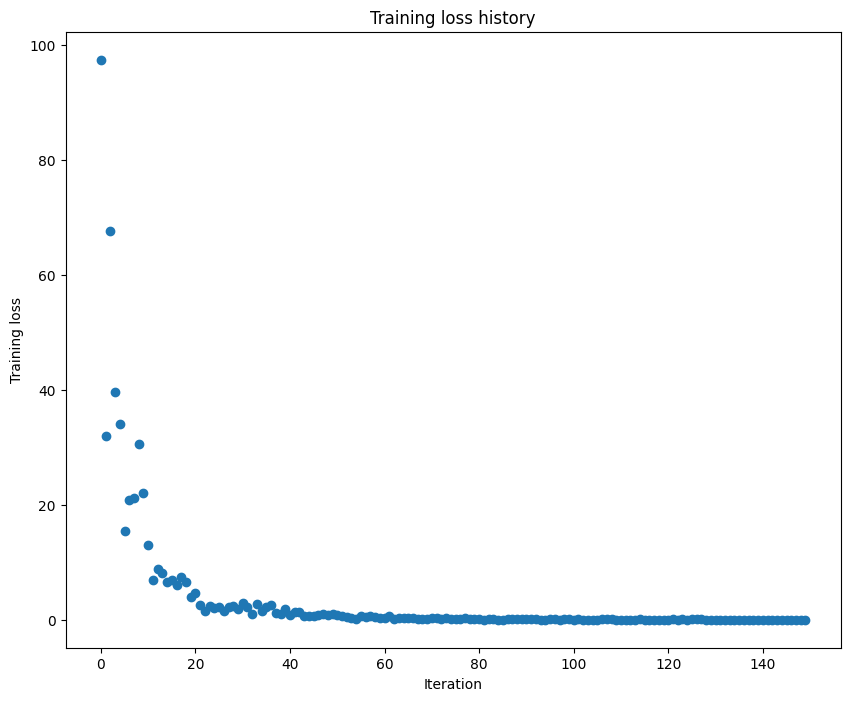

In [307]:
# TODO: Use a DeepConvNet to overfit 50 training examples by
# tweaking just the learning rate and initialization scale.
fix_random_seed(0)

num_train = 50
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = small_data['X_train'].shape[1:]

weight_scale = 2e-3   # Experiment with this!
learning_rate = 1e-5  # Experiment with this!
############################################################################
# TODO: Change weight_scale and learning_rate so your model achieves 100%  #
# training accuracy within 30 epochs.                                      #
############################################################################
# Replace "pass" statement with your code
weight_scale = 3e-1
learning_rate = 7e-3
############################################################################
#                             END OF YOUR CODE                             #
############################################################################
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                    num_filters=[8, 16, 32, 64],
                    max_pools=[0, 1, 2, 3],
                    reg=1e-5, weight_scale=weight_scale, **to_float_cuda)
solver = Solver(model, small_data,
                print_every=10, num_epochs=30, batch_size=10,
                update_rule=adam,
                optim_config={
                  'learning_rate': learning_rate,
                },
                device='cuda',
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Kaiming initialization
So far, you manually tuned the weight scale and for weight initialization.
However, this is inefficient when it comes to training deep neural networks; practically, as your weight matrix is larger, the weight scale should be small.
Below you will implement [Kaiming initialization](http://arxiv-web3.library.cornell.edu/abs/1502.01852). For more details, refer to [cs231n note](http://cs231n.github.io/neural-networks-2/#init) and [PyTorch documentation](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_normal_).

In [308]:
def kaiming_initializer(Din, Dout, K=None, relu=True, device='cpu',
                        dtype=torch.float32):
  """
  Implement Kaiming initialization for linear and convolution layers.

  Inputs:
  - Din, Dout: Integers giving the number of input and output dimensions for
    this layer
  - K: If K is None, then initialize weights for a linear layer with Din input
    dimensions and Dout output dimensions. Otherwise if K is a nonnegative
    integer then initialize the weights for a convolution layer with Din input
    channels, Dout output channels, and a kernel size of KxK.
  - relu: If ReLU=True, then initialize weights with a gain of 2 to account for
    a ReLU nonlinearity (Kaiming initializaiton); otherwise initialize weights
    with a gain of 1 (Xavier initialization).
  - device, dtype: The device and datatype for the output tensor.

  Returns:
  - weight: A torch Tensor giving initialized weights for this layer. For a
    linear layer it should have shape (Din, Dout); for a convolution layer it
    should have shape (Dout, Din, K, K).
  """
  gain = 2. if relu else 1.
  weight = None
  if K is None: # 线性层
    ###########################################################################
    # TODO: Implement Kaiming initialization for linear layer.                #
    # The weight scale is sqrt(gain / fan_in),                                #
    # where gain is 2 if ReLU is followed by the layer, or 1 if not,          #
    # and fan_in = num_in_channels (= Din).                                   #
    # The output should be a tensor in the designated size, dtype, and device.#
    ###########################################################################
    # Replace "pass" statement with your code
    weight = torch.randn((Din, Dout), device=device, dtype=dtype) / math.sqrt(Din/gain)
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################
  else:
    ###########################################################################
    # TODO: Implement Kaiming initialization for convolutional layer.         #
    # The weight scale is sqrt(gain / fan_in),                                #
    # where gain is 2 if ReLU is followed by the layer, or 1 if not,          #
    # and fan_in = num_in_channels (= Din) * K * K                            #
    # The output should be a tensor in the designated size, dtype, and device.#
    ###########################################################################
    # Replace "pass" statement with your code
    weight = torch.randn((Din, Dout, K, K), device=device, dtype=dtype) / math.sqrt((Din*K*K)/gain)
    ###########################################################################
    #                            END OF YOUR CODE                             #
    ###########################################################################
  return weight

# Convolutional nets with Kaiming initialization
Now that you have a working implementation for Kaiming initialization, go back to your [`DeepConvnet`](#scrollTo=Ah-_nwx2BSxl). Modify your implementation to add Kaiming initialization.

Concretely, when the `weight_scale` is set to `'kaiming'` in the constructor, you should initialize weights of convolutional and linear layers using `kaiming_initializer`. Once you are done, run the following to see the effect of kaiming initialization in deep CNNs.

In this experiment, we train a 31-layer network with four different weight initialization schemes. Among them, only the Kaiming initialization method should achieve a non-random accuracy after one epoch of training.

You may see `nan` loss when `weight_scale` is large, this shows a catastrophe of inappropriate weight initialization.

In [309]:
fix_random_seed(0)

# Try training a deep convolutional net with different weight initialization methods
num_train = 10000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]

weight_scales = ['kaiming', 1e-1, 1e-2, 1e-3]

solvers = []
for weight_scale in weight_scales:
  print('Solver with weight scale: ', weight_scale)
  model = DeepConvNet(input_dims=input_dims, num_classes=10,
                      num_filters=([8] * 10) + ([32] * 10) + ([128] * 10),
                      max_pools=[9, 19],
                      weight_scale=weight_scale,
                      reg=1e-5, **to_float_cuda)

  solver = Solver(model, small_data,
                  num_epochs=1, batch_size=128,
                  update_rule=sgd_momentum,
                  optim_config={
                    'learning_rate': 2e-3,
                  },
                  print_every=20, device='cuda')
  solver.train()
  solvers.append(solver)

Solver with weight scale:  kaiming
(Time 0.05 sec; Iteration 1 / 78) loss: 2.335846
(Epoch 0 / 1) train acc: 0.111000; val_acc: 0.102400
(Time 1.23 sec; Iteration 21 / 78) loss: 2.326164
(Time 1.96 sec; Iteration 41 / 78) loss: 2.324687
(Time 2.68 sec; Iteration 61 / 78) loss: 2.286036
(Epoch 1 / 1) train acc: 0.177000; val_acc: 0.174800
Solver with weight scale:  0.1
(Time 0.04 sec; Iteration 1 / 78) loss: 127.605461
(Epoch 0 / 1) train acc: 0.095000; val_acc: 0.096400
(Time 1.25 sec; Iteration 21 / 78) loss: nan
(Time 1.96 sec; Iteration 41 / 78) loss: nan
(Time 2.69 sec; Iteration 61 / 78) loss: nan
(Epoch 1 / 1) train acc: 0.092000; val_acc: 0.097600
Solver with weight scale:  0.01
(Time 0.04 sec; Iteration 1 / 78) loss: 2.304123
(Epoch 0 / 1) train acc: 0.092000; val_acc: 0.096400
(Time 1.28 sec; Iteration 21 / 78) loss: 2.304172
(Time 2.02 sec; Iteration 41 / 78) loss: 2.304478
(Time 2.78 sec; Iteration 61 / 78) loss: 2.303338
(Epoch 1 / 1) train acc: 0.093000; val_acc: 0.093600


In [310]:
def plot_training_history_init(title, xlabel, solvers, labels, plot_fn, marker='-o'):
  plt.title(title)
  plt.xlabel(xlabel)
  for solver, label in zip(solvers, labels):
    data = plot_fn(solver)
    label = 'weight_scale=' + str(label)
    plt.plot(data, marker, label=label)
  plt.legend(loc='lower center', ncol=len(solvers))

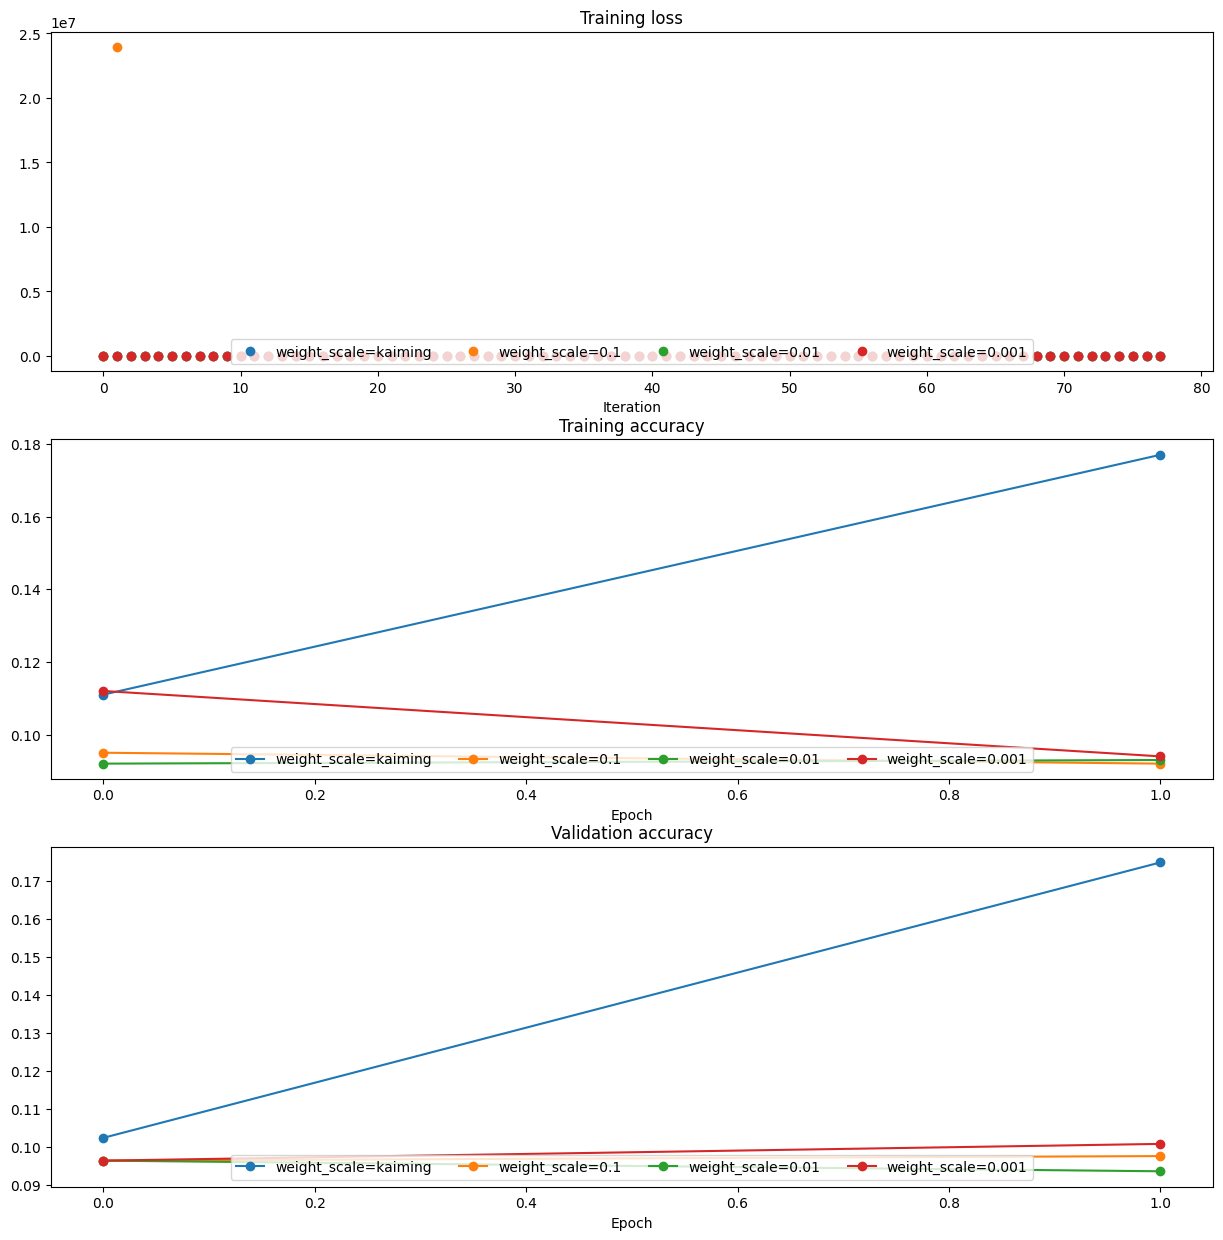

In [311]:
plt.subplot(3, 1, 1)
plot_training_history_init('Training loss','Iteration', solvers, weight_scales,
                            lambda x: x.loss_history, marker='o')
plt.subplot(3, 1, 2)
plot_training_history_init('Training accuracy','Epoch', solvers, weight_scales,
                           lambda x: x.train_acc_history)
plt.subplot(3, 1, 3)
plot_training_history_init('Validation accuracy','Epoch', solvers, weight_scales,
                           lambda x: x.val_acc_history)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model!
Train the best convolutional model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 72% accuracy on the validation set using a convolutional net, within 60 seconds of training.

You might find it useful to use batch normalization in your model. However, since we do not ask you to implement it CUDA-friendly, it might slow down training.

Hint: Your model does not have to be too deep.

Hint 2: We used `batch_size = 128` for training a model with 76% validation accuracy. You don't have to follow this, but it would save your time for hyperparameter search.

In [312]:
input_dims = data_dict['X_train'].shape[1:]
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

model = None
solver = None
################################################################################
# TODO: Train the best DeepConvNet that you can on CIFAR-10 within 60 seconds. #
################################################################################
# Replace "pass" statement with your code
device = data_dict['X_train'].device
dt = data_dict['X_train'].dtype
# using kaiming weight scale
learning_rate = [1e-3, 2e-3, 3e-3, 5e-3]
reg = [0, 5e-4, 6e-4, 7e-4, 1e-3, 5e-3]
lr = learning_rate[1]
r = reg[2]
model = DeepConvNet(input_dims=input_dims, num_classes=num_classes,
                      num_filters=[32, 64, 128],
                      max_pools=[0, 1],
                      reg=r,
                      batchnorm=False,
                      weight_scale='kaiming',
                      **to_double_cuda)
solver = Solver(model, data_dict,
                print_every=50, num_epochs=5,
                update_rule=adam,
                optim_config={
                  'learning_rate': lr,
                  'batch_size': 128, 
                },
                device='cuda',
         )
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
solver.train(time_limit=120)

torch.backends.cudnn.benchmark = False

(Time 0.04 sec; Iteration 1 / 2375) loss: 2.429886
(Epoch 0 / 5) train acc: 0.086000; val_acc: 0.100400
(Time 2.26 sec; Iteration 51 / 2375) loss: 1.730247
(Time 4.09 sec; Iteration 101 / 2375) loss: 1.580572
(Time 5.91 sec; Iteration 151 / 2375) loss: 1.409370
(Time 7.79 sec; Iteration 201 / 2375) loss: 1.397218
(Time 9.65 sec; Iteration 251 / 2375) loss: 1.180376
(Time 11.50 sec; Iteration 301 / 2375) loss: 1.177200
(Time 13.36 sec; Iteration 351 / 2375) loss: 1.182703
(Time 15.18 sec; Iteration 401 / 2375) loss: 1.222507
(Time 17.02 sec; Iteration 451 / 2375) loss: 1.209603
(Epoch 1 / 5) train acc: 0.634000; val_acc: 0.619600
(Time 19.23 sec; Iteration 501 / 2375) loss: 1.164883
(Time 21.05 sec; Iteration 551 / 2375) loss: 1.190673
(Time 22.89 sec; Iteration 601 / 2375) loss: 1.199592
(Time 24.72 sec; Iteration 651 / 2375) loss: 1.115634
(Time 26.55 sec; Iteration 701 / 2375) loss: 1.101291
(Time 28.38 sec; Iteration 751 / 2375) loss: 1.167518
(Time 30.20 sec; Iteration 801 / 2375) 

# Test your model!
Run your best model on the validation and test sets. You should achieve above 72% accuracy on the validation set and 70% accuracy on the test set.

(Our best model gets 76% validation accuracy and 75% test accuracy -- can you beat ours?)


In [313]:
print('Validation set accuracy: ', solver.check_accuracy(data_dict['X_val'], data_dict['y_val']))
print('Test set accuracy: ', solver.check_accuracy(data_dict['X_test'], data_dict['y_test']))

Validation set accuracy:  0.7407999634742737
Test set accuracy:  0.7293999791145325


# Batch Normalization
One way to make deep networks easier to train is to use more sophisticated optimization procedures such as SGD+momentum, RMSProp, or Adam. Another strategy is to change the architecture of the network to make it easier to train.
One idea along these lines is batch normalization which was proposed by [1] in 2015.

The idea is relatively straightforward. Machine learning methods tend to work better when their input data consists of uncorrelated features with zero mean and unit variance. When training a neural network, we can preprocess the data before feeding it to the network to explicitly decorrelate its features; this will ensure that the first layer of the network sees data that follows a nice distribution. However, even if we preprocess the input data, the activations at deeper layers of the network will likely no longer be decorrelated and will no longer have zero mean or unit variance since they are output from earlier layers in the network. Even worse, during the training process the distribution of features at each layer of the network will shift as the weights of each layer are updated.

The authors of [1] hypothesize that the shifting distribution of features inside deep neural networks may make training deep networks more difficult. To overcome this problem, [1] proposes to insert batch normalization layers into the network. At training time, a batch normalization layer uses a minibatch of data to estimate the mean and standard deviation of each feature. These estimated means and standard deviations are then used to center and normalize the features of the minibatch. A running average of these means and standard deviations is kept during training, and at test time these running averages are used to center and normalize features.

It is possible that this normalization strategy could reduce the representational power of the network, since it may sometimes be optimal for certain layers to have features that are not zero-mean or unit variance. To this end, the batch normalization layer includes learnable shift and scale parameters for each feature dimension.

[1] [Sergey Ioffe and Christian Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift", ICML 2015.](https://arxiv.org/abs/1502.03167)

In [314]:
class BatchNorm(object):

  @staticmethod
  def forward(x, gamma, beta, bn_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

  @staticmethod
  def backward_alt(dout, cache):
    raise NotImplementedError

## Batch normalization: forward
Implement the batch normalization forward pass in the function `BatchNorm.forward`. Once you have done so, run the following to test your implementation.

Referencing the paper linked to above in [1] may be helpful!

In [382]:
def batchnorm_forward(x, gamma, beta, bn_param):
  """
  Forward pass for batch normalization.

  During training the sample mean and (uncorrected) sample variance are
  computed from minibatch statistics and used to normalize the incoming data.
  During training we also keep an exponentially decaying running mean of the
  mean and variance of each feature, and these averages are used to normalize
  data at test-time.

  At each timestep we update the running averages for mean and variance using
  an exponential decay based on the momentum parameter:

  running_mean = momentum * running_mean + (1 - momentum) * sample_mean
  running_var = momentum * running_var + (1 - momentum) * sample_var

  Note that the batch normalization paper suggests a different test-time
  behavior: they compute sample mean and variance for each feature using a
  large number of training images rather than using a running average. For
  this implementation we have chosen to use running averages instead since
  they do not require an additional estimation step; the PyTorch
  implementation of batch normalization also uses running averages.

  Input:
  - x: Data of shape (N, D)
  - gamma: Scale parameter of shape (D,)
  - beta: Shift paremeter of shape (D,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features

  Returns a tuple of:
  - out: of shape (N, D)
  - cache: A tuple of values needed in the backward pass
  """
  mode = bn_param['mode']
  eps = bn_param.get('eps', 1e-5)
  momentum = bn_param.get('momentum', 0.9)

  N, D = x.shape
  running_mean = bn_param.get('running_mean', torch.zeros(D, dtype=x.dtype, device=x.device))
  running_var = bn_param.get('running_var', torch.zeros(D, dtype=x.dtype, device=x.device))

  out, cache, xhat = None, None, None
  if mode == 'train':
    #######################################################################
    # TODO: Implement the training-time forward pass for batch norm.      #
    # Use minibatch statistics to compute the mean and variance, use      #
    # these statistics to normalize the incoming data, and scale and      #
    # shift the normalized data using gamma and beta.                     #
    #                                                                     #
    # You should store the output in the variable out. Any intermediates  #
    # that you need for the backward pass should be stored in the cache   #
    # variable.                                                           #
    #                                                                     #
    # You should also use your computed sample mean and variance together #
    # with the momentum variable to update the running mean and running   #
    # variance, storing your result in the running_mean and running_var   #
    # variables.                                                          #
    #                                                                     #
    # Note that though you should be keeping track of the running         #
    # variance, you should normalize the data based on the standard       #
    # deviation (square root of variance) instead!                        #
    # Referencing the original paper (https://arxiv.org/abs/1502.03167)   #
    # might prove to be helpful.                                          #
    #######################################################################
    # Replace "pass" statement with your code
    N, D = x.shape
    mu = x.mean(dim=0)  # [D]
    # print("x shape",x.shape,"mu shape",mu.shape)
    sig2 = x.var(dim=0, unbiased=False) # [D]
    out = (x-mu)/torch.sqrt(sig2+eps) # [N, D]
    xhat = out
    out = gamma * out + beta
    running_mean = momentum*running_mean + (1-momentum)*mu
    running_var = momentum*running_var + (1-momentum)*sig2
    cache = ('train', x, xhat, gamma, beta, mu, sig2, eps)
    # print(len(cache))
    #######################################################################
    #                           END OF YOUR CODE                          #
    #######################################################################
  elif mode == 'test':
    #######################################################################
    # TODO: Implement the test-time forward pass for batch normalization. #
    # Use the running mean and variance to normalize the incoming data,   #
    # then scale and shift the normalized data using gamma and beta.      #
    # Store the result in the out variable.                               #
    #######################################################################
    # Replace "pass" statement with your code
    out = (x-running_mean)/torch.sqrt(running_var+eps)
    out = gamma * out + beta
    cache = ('test', x, xhat, gamma, beta, running_mean, running_var, eps)
    #######################################################################
    #                           END OF YOUR CODE                          #
    #######################################################################
  else:
    raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

  # Store the updated running means back into bn_param
  bn_param['running_mean'] = running_mean.detach()
  bn_param['running_var'] = running_var.detach()

  return out, cache

BatchNorm.forward = batchnorm_forward

After implementing the forward pass for batch normalization, you can run the following to sanity check your implementation. After running batch normalization with beta=0 and gamma=1, the data should have zero mean and unit variance.

After running batch normalization with nontrivial beta and gamma, the output data should have mean approximately equal to beta, and std approximatly equal to gamma.

In [316]:
# Check the training-time forward pass by checking means and variances
# of features both before and after batch normalization
def print_mean_std(x,dim=0):
  means = ['%.3f' % xx for xx in x.mean(dim=dim).tolist()]
  stds = ['%.3f' % xx for xx in x.std(dim=dim).tolist()]
  print('  means: ', means)
  print('  stds:  ', stds)
  print()

# Simulate the forward pass for a two-layer network
fix_random_seed(0)
N, D1, D2, D3 = 200, 50, 60, 3
X = torch.randn(N, D1, **to_double_cuda)
W1 = torch.randn(D1, D2, **to_double_cuda)
W2 = torch.randn(D2, D3, **to_double_cuda)
a = X.matmul(W1).clamp(min=0.).matmul(W2)

print('Before batch normalization:')
print_mean_std(a,dim=0)

# Run with gamma=1, beta=0. Means should be close to zero and stds close to one
gamma = torch.ones(D3, **to_double_cuda)
beta = torch.zeros(D3, **to_double_cuda)
print('After batch normalization (gamma=1, beta=0)')
a_norm, _ = BatchNorm.forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,dim=0)

# Run again with nontrivial gamma and beta. Now means should be close to beta
# and std should be close to gamma.
gamma = torch.tensor([1.0, 2.0, 3.0], **to_double_cuda)
beta = torch.tensor([11.0, 12.0, 13.0], **to_double_cuda)
print('After batch normalization (gamma=', gamma.tolist(), ', beta=', beta.tolist(), ')')
a_norm, _ = BatchNorm.forward(a, gamma, beta, {'mode': 'train'})
print_mean_std(a_norm,dim=0)

Before batch normalization:
  means:  ['52.046', '11.122', '10.243']
  stds:   ['34.646', '30.732', '39.429']

After batch normalization (gamma=1, beta=0)
  means:  ['-0.000', '-0.000', '0.000']
  stds:   ['1.003', '1.003', '1.003']

After batch normalization (gamma= [1.0, 2.0, 3.0] , beta= [11.0, 12.0, 13.0] )
  means:  ['11.000', '12.000', '13.000']
  stds:   ['1.003', '2.005', '3.008']



We can sanity-check the test-time forward pass of batch normalization by running the following. First we run the training-time forward pass many times to "warm up" the running averages. If we then run a test-time forward pass, the output should have approximately zero mean and unit variance.

In [317]:
fix_random_seed(0)
N, D1, D2, D3 = 200, 50, 60, 3
W1 = torch.randn(D1, D2, **to_double_cuda)
W2 = torch.randn(D2, D3, **to_double_cuda)

bn_param = {'mode': 'train'}
gamma = torch.ones(D3, **to_double_cuda)
beta = torch.zeros(D3, **to_double_cuda)

for t in range(500):
  X = torch.randn(N, D1, **to_double_cuda)
  a = X.matmul(W1).clamp(min=0.).matmul(W2)
  BatchNorm.forward(a, gamma, beta, bn_param)

bn_param['mode'] = 'test'
X = torch.randn(N, D1, **to_double_cuda)
a = X.matmul(W1).clamp(min=0.).matmul(W2)
a_norm, _ = BatchNorm.forward(a, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After batch normalization (test-time):')
print_mean_std(a_norm,dim=0)

After batch normalization (test-time):
  means:  ['0.031', '-0.051', '0.061']
  stds:   ['1.011', '0.958', '1.068']



## Batch normalization: backward
Now implement the backward pass for batch normalization in the function `BatchNorm.backward`.

To derive the backward pass you should write out the computation graph for batch normalization and backprop through each of the intermediate nodes. Some intermediates may have multiple outgoing branches; make sure to sum gradients across these branches in the backward pass.

Please don't forget to implement the train and test mode separately.

Once you have finished, run the following to numerically check your backward pass.

In [372]:
def batchnorm_backward(dout, cache):
  """
  Backward pass for batch normalization.

  For this implementation, you should write out a computation graph for
  batch normalization on paper and propagate gradients backward through
  intermediate nodes.

  Inputs:
  - dout: Upstream derivatives, of shape (N, D)
  - cache: Variable of intermediates from batchnorm_forward.

  Returns a tuple of:
  - dx: Gradient with respect to inputs x, of shape (N, D)
  - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
  - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
  """
  dx, dgamma, dbeta = None, None, None
  ###########################################################################
  # TODO: Implement the backward pass for batch normalization. Store the    #
  # results in the dx, dgamma, and dbeta variables.                         #
  # Referencing the original paper (https://arxiv.org/abs/1502.03167)       #
  # might prove to be helpful.                                              #
  # Don't forget to implement train and test mode separately.               #
  ###########################################################################
  # Replace "pass" statement with your code
  mode, x, xhat, gamma, beta, mean, var, eps = cache  
  if mode == 'train':
    N = x.shape[0]
    dxhat = dout*gamma # [N, D]
    dvar = (dxhat*(-1/2)*(x-mean)*((var+eps)**(-1.5))).sum(dim=0) # [D]
    dmean = dvar*((2*mean-2*x).mean(dim=0)) - (dxhat/torch.sqrt(var+eps)).sum(dim=0) #[D]
    dx = dxhat/(torch.sqrt(var+eps)) + dvar*(2*(x-mean))/N + dmean/N #[N, D]
    dgamma = (dout*xhat).sum(dim=0) #[D]
    dbeta = dout.sum(dim=0) #[D]
  elif mode == 'test':  
    dbeta = 1. * dout.sum(dim=0)
    dgamma = torch.sum((x-mean)/((var + eps) ** 0.5) * dout, dim=0)
    dx = gamma / ((var + eps) ** 0.5)
    # dx = dout*gamma
    # dgamma = (dout*xhat).sum(dim=0) #[D]
    # dbeta = dout.sum(dim=0) #[D]
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

BatchNorm.backward = batchnorm_backward

In [319]:
# Gradient check batchnorm backward pass
fix_random_seed(0)
N, D = 4, 5
x = 5 * torch.randn(N, D, **to_double_cuda) + 12
gamma = torch.randn(D, **to_double_cuda)
beta = torch.randn(D, **to_double_cuda)
dout = torch.randn(N, D, **to_double_cuda)

bn_param = {'mode': 'train'}
fx = lambda x: BatchNorm.forward(x, gamma, beta, bn_param)[0]
fg = lambda a: BatchNorm.forward(x, a, beta, bn_param)[0]
fb = lambda b: BatchNorm.forward(x, gamma, b, bn_param)[0]

dx_num = compute_numeric_gradient(fx, x, dout)
da_num = compute_numeric_gradient(fg, gamma.clone(), dout)
db_num = compute_numeric_gradient(fb, beta.clone(), dout)

_, cache = BatchNorm.forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = BatchNorm.backward(dout, cache)
# You should expect to see relative errors between 1e-12 and 1e-9
print('dx error: ', rel_error(dx_num, dx))
print('dgamma error: ', rel_error(da_num, dgamma))
print('dbeta error: ', rel_error(db_num, dbeta))

dx error:  1.4719039312566747e-09
dgamma error:  9.66697325429414e-12
dbeta error:  1.285238313552545e-11


## Batch normalization: alternative backward
In class we talked about two different implementations for the sigmoid backward pass. One strategy is to write out a computation graph composed of simple operations and backprop through all intermediate values. Another strategy is to work out the derivatives on paper. For example, you can derive a very simple formula for the sigmoid function's backward pass by simplifying gradients on paper.

Surprisingly, it turns out that you can do a similar simplification for the batch normalization backward pass too!  

In the forward pass, given a set of inputs $X=\begin{bmatrix}x_1\\x_2\\...\\x_N\end{bmatrix}$,

we first calculate the mean $\mu$ and variance $v$.
With $\mu$ and $v$ calculated, we can calculate the standard deviation $\sigma$  and normalized data $Y$.
The equations and graph illustration below describe the computation ($y_i$ is the i-th element of the vector $Y$).

\begin{align}
& \mu=\frac{1}{N}\sum_{k=1}^N x_k  &  v=\frac{1}{N}\sum_{k=1}^N (x_k-\mu)^2 \\
& \sigma=\sqrt{v+\epsilon}         &  y_i=\frac{x_i-\mu}{\sigma}
\end{align}

<img src="https://web.eecs.umich.edu/~justincj/teaching/eecs498/assets/a3/batchnorm_graph.png" width=691 height=202>

The meat of our problem during backpropagation is to compute $\frac{\partial L}{\partial X}$, given the upstream gradient we receive, $\frac{\partial L}{\partial Y}.$ To do this, recall the chain rule in calculus gives us $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial X}$.

The unknown/hart part is $\frac{\partial Y}{\partial X}$. We can find this by first deriving step-by-step our local gradients at
$\frac{\partial v}{\partial X}$, $\frac{\partial \mu}{\partial X}$,
$\frac{\partial \sigma}{\partial v}$,
$\frac{\partial Y}{\partial \sigma}$, and $\frac{\partial Y}{\partial \mu}$,
and then use the chain rule to compose these gradients (which appear in the form of vectors!) appropriately to compute $\frac{\partial Y}{\partial X}$.

If it's challenging to directly reason about the gradients over $X$ and $Y$ which require matrix multiplication, try reasoning about the gradients in terms of individual elements $x_i$ and $y_i$ first: in that case, you will need to come up with the derivations for $\frac{\partial L}{\partial x_i}$, by relying on the Chain Rule to first calculate the intermediate $\frac{\partial \mu}{\partial x_i}, \frac{\partial v}{\partial x_i}, \frac{\partial \sigma}{\partial x_i},$ then assemble these pieces to calculate $\frac{\partial y_i}{\partial x_i}$.

You should make sure each of the intermediary gradient derivations are all as simplified as possible, for ease of implementation.

After doing so, implement the simplified batch normalization backward pass in the function `BatchNorm.backward_alt` and compare the two implementations by running the following. Your two implementations should compute nearly identical results, but the alternative implementation should be a bit faster.

In [320]:
def batchnorm_backward_alt(dout, cache):
  """
  Alternative backward pass for batch normalization.
  For this implementation you should work out the derivatives for the batch
  normalizaton backward pass on paper and simplify as much as possible. You
  should be able to derive a simple expression for the backward pass.
  See the jupyter notebook for more hints.

  Note: This implementation should expect to receive the same cache variable
  as batchnorm_backward, but might not use all of the values in the cache.

  Inputs / outputs: Same as batchnorm_backward
  """
  dx, dgamma, dbeta = None, None, None
  ###########################################################################
  # TODO: Implement the backward pass for batch normalization. Store the    #
  # results in the dx, dgamma, and dbeta variables.                         #
  #                                                                         #
  # After computing the gradient with respect to the centered inputs, you   #
  # should be able to compute gradients with respect to the inputs in a     #
  # single statement; our implementation fits on a single 80-character line.#
  ###########################################################################
  # Replace "pass" statement with your code
  mode, x, xhat, gamma, beta, mean, var, eps = cache  
  N = dout.shape[0]
  std = torch.sqrt(var+eps) # σ
  dgamma = (dout*xhat).sum(dim=0) #[D]
  dbeta = dout.sum(dim=0) #[D]
  dmu = torch.sum(dout, dim=0)/N
  dvar = 2/N*torch.sum((x-mean)*dout, dim=0)
  dstd = dvar/(2*std)
  dx = gamma*((dout - dmu)*std - dstd*(x-mean))/(std**2)
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

BatchNorm.backward_alt = batchnorm_backward_alt

In [339]:
fix_random_seed(0)
N, D = 128, 2048
x = 5 * torch.randn(N, D, **to_double_cuda) + 12
gamma = torch.randn(D, **to_double_cuda)
beta = torch.randn(D, **to_double_cuda)
dout = torch.randn(N, D, **to_double_cuda)

bn_param = {'mode': 'train'}
out, cache = BatchNorm.forward(x, gamma, beta, bn_param)

t1 = time.time()
dx1, dgamma1, dbeta1 = BatchNorm.backward(dout, cache)
t2 = time.time()
dx2, dgamma2, dbeta2 = BatchNorm.backward_alt(dout, cache)
t3 = time.time()

print('dx difference: ', rel_error(dx1, dx2))
print('dgamma difference: ', rel_error(dgamma1, dgamma2))
print('dbeta difference: ', rel_error(dbeta1, dbeta2))
print('speedup: %.2fx' % ((t2 - t1) / (t3 - t2 + 1e-9)))

dx difference:  6.217349771238822e-12
dgamma difference:  0.0
dbeta difference:  0.0
speedup: 487327.58x


# Spatial Batch Normalization
As proposed in the original paper, batch normalization can also be used for convolutional networks, but we need to tweak it a bit; the modification will be called "spatial batch normalization."

Normally batch-normalization accepts inputs of shape `(N, D)` and produces outputs of shape `(N, D)`, where we normalize across the minibatch dimension `N`. For data coming from convolutional layers, batch normalization needs to accept inputs of shape `(N, C, H, W)` and produce outputs of shape `(N, C, H, W)` where the `N` dimension gives the minibatch size and the `(H, W)` dimensions give the spatial size of the feature map.

If the feature map was produced using convolutions, then we expect every feature channel's statistics e.g. mean, variance to be relatively consistent both between different images, and different locations within the same image -- after all, every feature channel is produced by the same convolutional filter! Therefore spatial batch normalization computes a mean and variance for each of the `C` feature channels by computing statistics over the minibatch dimension `N` as well the spatial dimensions `H` and `W`.


[1] [Sergey Ioffe and Christian Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift", ICML 2015.](https://arxiv.org/abs/1502.03167)

In [322]:
class SpatialBatchNorm(object):

  @staticmethod
  def forward(x, gamma, beta, bn_param):
    raise NotImplementedError

  @staticmethod
  def backward(dout, cache):
    raise NotImplementedError

## Spatial batch normalization: forward

Implement the forward pass for spatial batch normalization in the function `SpatialBatchNorm.forward`. Check your implementation by running the following:

In [ ]:
def spatial_batchnorm_forward(x, gamma, beta, bn_param):
  """
  Computes the forward pass for spatial batch normalization.

  Inputs:
  - x: Input data of shape (N, C, H, W)
  - gamma: Scale parameter, of shape (C,)
  - beta: Shift parameter, of shape (C,)
  - bn_param: Dictionary with the following keys:
    - mode: 'train' or 'test'; required
    - eps: Constant for numeric stability
    - momentum: Constant for running mean / variance. momentum=0 means that
    old information is discarded completely at every time step, while
    momentum=1 means that new information is never incorporated. The
    default of momentum=0.9 should work well in most situations.
    - running_mean: Array of shape (D,) giving running mean of features
    - running_var Array of shape (D,) giving running variance of features

  Returns a tuple of:
  - out: Output data, of shape (N, C, H, W)
  - cache: Values needed for the backward pass
  """
  out, cache = None, None
  ###########################################################################
  # TODO: Implement the forward pass for spatial batch normalization.       #
  #                                                                         #
  # HINT: You can implement spatial batch normalization by calling the      #
  # vanilla version of batch normalization you implemented above.           #
  # Your implementation should be very short; ours is less than five lines. #
  ###########################################################################
  # Replace "pass" statement with your code
  # mode, eps, momentum = bn_param['mode'], bn_param['eps'], bn_param['momentum']
  N, C, H, W = x.shape
  out = x.permute(0,2,3,1).reshape(-1, C)
  out, cache = batchnorm_forward(out, gamma, beta, bn_param)
  out = out.reshape(N, H, W, C).permute(0,3,1,2)
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return out, cache

SpatialBatchNorm.forward = spatial_batchnorm_forward

After implementing the forward pass for spatial batch normalization, you can run the following to sanity check your code.

In [324]:
fix_random_seed(0)
# Check the training-time forward pass by checking means and variances
# of features both before and after spatial batch normalization

N, C, H, W = 2, 3, 4, 5
x = 4 * torch.randn(N, C, H, W, **to_double_cuda) + 10

print('Before spatial batch normalization:')
print('  Shape: ', x.shape)
print('  Means: ', x.mean(dim=(0, 2, 3)))
print('  Stds: ', x.std(dim=(0, 2, 3)))

# Means should be close to zero and stds close to one
gamma, beta = torch.ones(C, **to_double_cuda), torch.zeros(C, **to_double_cuda)
bn_param = {'mode': 'train'}
out, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
print('After spatial batch normalization:')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(dim=(0, 2, 3)))
print('  Stds: ', out.std(dim=(0, 2, 3)))

# Means should be close to beta and stds close to gamma
gamma, beta = torch.tensor([3, 4, 5], **to_double_cuda), torch.tensor([6, 7, 8], **to_double_cuda)
out, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
print('After spatial batch normalization (nontrivial gamma, beta):')
print('  Shape: ', out.shape)
print('  Means: ', out.mean(dim=(0, 2, 3)))
print('  Stds: ', out.std(dim=(0, 2, 3)))

Before spatial batch normalization:
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([ 9.5501, 10.2173,  9.8379], device='cuda:0', dtype=torch.float64)
  Stds:  tensor([3.9212, 4.7963, 3.6011], device='cuda:0', dtype=torch.float64)
After spatial batch normalization:
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([-2.2204e-16,  1.9706e-16, -2.1094e-16], device='cuda:0',
       dtype=torch.float64)
  Stds:  tensor([1.0127, 1.0127, 1.0127], device='cuda:0', dtype=torch.float64)
After spatial batch normalization (nontrivial gamma, beta):
  Shape:  torch.Size([2, 3, 4, 5])
  Means:  tensor([6., 7., 8.], device='cuda:0', dtype=torch.float64)
  Stds:  tensor([3.0382, 4.0510, 5.0637], device='cuda:0', dtype=torch.float64)


Similar to the vanilla batch normalization implementation, run the following to sanity-check the test-time forward pass of spatial batch normalization.

In [325]:
fix_random_seed(0)
# Check the test-time forward pass by running the training-time
# forward pass many times to warm up the running averages, and then
# checking the means and variances of activations after a test-time
# forward pass.
N, C, H, W = 10, 4, 11, 12

bn_param = {'mode': 'train'}
gamma = torch.ones(C, **to_double_cuda)
beta = torch.zeros(C, **to_double_cuda)
for t in range(50):
  x = 2.3 * torch.randn(N, C, H, W, **to_double_cuda) + 13
  SpatialBatchNorm.forward(x, gamma, beta, bn_param)
bn_param['mode'] = 'test'
x = 2.3 * torch.randn(N, C, H, W, **to_double_cuda) + 13
a_norm, _ = SpatialBatchNorm.forward(x, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print('After spatial batch normalization (test-time):')
print('  means: ', a_norm.mean(dim=(0, 2, 3)))
print('  stds: ', a_norm.std(dim=(0, 2, 3)))

After spatial batch normalization (test-time):
  means:  tensor([0.0188, 0.0145, 0.0422, 0.0231], device='cuda:0', dtype=torch.float64)
  stds:  tensor([0.9861, 1.0143, 1.0138, 0.9916], device='cuda:0', dtype=torch.float64)


## Spatial batch normalization: backward
Implement the backward pass for spatial batch normalization in the function `SpatialBatchNorm.backward`.

In [341]:
def spatial_batchnorm_backward(dout, cache):
  """
  Computes the backward pass for spatial batch normalization.
  Inputs:
  - dout: Upstream derivatives, of shape (N, C, H, W)
  - cache: Values from the forward pass
  Returns a tuple of:
  - dx: Gradient with respect to inputs, of shape (N, C, H, W)
  - dgamma: Gradient with respect to scale parameter, of shape (C,)
  - dbeta: Gradient with respect to shift parameter, of shape (C,)
  """
  dx, dgamma, dbeta = None, None, None

  ###########################################################################
  # TODO: Implement the backward pass for spatial batch normalization.      #
  #                                                                         #
  # HINT: You can implement spatial batch normalization by calling the      #
  # vanilla version of batch normalization you implemented above.           #
  # Your implementation should be very short; ours is less than five lines. #
  ###########################################################################
  # Replace "pass" statement with your code
  N, C, H, W = dout.shape
  dout = dout.permute((0, 2, 3, 1))
  dout_t = dout.reshape(-1, C)
  dx, dgamma, dbeta = batchnorm_backward_alt(dout_t, cache)
  # We need to reshape dx back to our desired shape.
  dx = dx.reshape(N, H, W, C).permute((0, 3, 1, 2))
  dx = dx.contiguous()
  ###########################################################################
  #                             END OF YOUR CODE                            #
  ###########################################################################

  return dx, dgamma, dbeta

SpatialBatchNorm.backward = spatial_batchnorm_backward

After implementing the backward pass for spatial batch normalization, run the following to perform numeric gradient checking on your implementation. You should see errors less than `1e-6`.

In [ ]:
fix_random_seed(0)
N, C, H, W = 2, 3, 4, 5
x = 5 * torch.randn(N, C, H, W, **to_double_cuda) + 12
gamma = torch.randn(C, **to_double_cuda)
beta = torch.randn(C, **to_double_cuda)
dout = torch.randn(N, C, H, W, **to_double_cuda)

bn_param = {'mode': 'train'}
fx = lambda x: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]
fg = lambda a: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]
fb = lambda b: SpatialBatchNorm.forward(x, gamma, beta, bn_param)[0]

dx_num = compute_numeric_gradient(fx, x, dout)
da_num = compute_numeric_gradient(fg, gamma, dout)
db_num = compute_numeric_gradient(fb, beta, dout)

_, cache = SpatialBatchNorm.forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = SpatialBatchNorm.backward(dout, cache)
print('dx error: ', rel_error(dx_num, dx))
print('dgamma error: ', rel_error(da_num, dgamma))
print('dbeta error: ', rel_error(db_num, dbeta))
# 跑不起来, 应该是他的库的原因, 据说在 .view() 前面加一个 .contiguous() 就好了

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

# "Sandwich" layers with batch normalization
Again, below you will find sandwich layers that implement a few commonly used patterns for convolutional networks.

In [353]:
class Linear_BatchNorm_ReLU(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, bn_param):
    """
    Convenience layer that performs an linear transform, batch normalization,
    and ReLU.
    Inputs:
    - x: Array of shape (N, D1); input to the linear layer
    - w, b: Arrays of shape (D2, D2) and (D2,) giving the weight and bias for
      the linear transform.
    - gamma, beta: Arrays of shape (D2,) and (D2,) giving scale and shift
      parameters for batch normalization.
    - bn_param: Dictionary of parameters for batch normalization.
    Returns:
    - out: Output from ReLU, of shape (N, D2)
    - cache: Object to give to the backward pass.
    """
    a, fc_cache = Linear.forward(x, w, b)
    a_bn, bn_cache = BatchNorm.forward(a, gamma, beta, bn_param)
    out, relu_cache = ReLU.forward(a_bn)
    cache = (fc_cache, bn_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    """
    Backward pass for the linear-batchnorm-relu convenience layer.
    """
    fc_cache, bn_cache, relu_cache = cache
    da_bn = ReLU.backward(dout, relu_cache)
    da, dgamma, dbeta = BatchNorm.backward(da_bn, bn_cache)
    dx, dw, db = Linear.backward(da, fc_cache)
    return dx, dw, db, dgamma, dbeta


class Conv_BatchNorm_ReLU(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, conv_param, bn_param):
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    an, bn_cache = SpatialBatchNorm.forward(a, gamma, beta, bn_param)
    out, relu_cache = ReLU.forward(an)
    cache = (conv_cache, bn_cache, relu_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    conv_cache, bn_cache, relu_cache = cache
    dan = ReLU.backward(dout, relu_cache)
    da, dgamma, dbeta = SpatialBatchNorm.backward(dan, bn_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db, dgamma, dbeta


class Conv_BatchNorm_ReLU_Pool(object):

  @staticmethod
  def forward(x, w, b, gamma, beta, conv_param, bn_param, pool_param):
    a, conv_cache = FastConv.forward(x, w, b, conv_param)
    an, bn_cache = SpatialBatchNorm.forward(a, gamma, beta, bn_param)
    s, relu_cache = ReLU.forward(an)
    out, pool_cache = FastMaxPool.forward(s, pool_param)
    cache = (conv_cache, bn_cache, relu_cache, pool_cache)
    return out, cache

  @staticmethod
  def backward(dout, cache):
    conv_cache, bn_cache, relu_cache, pool_cache = cache
    ds = FastMaxPool.backward(dout, pool_cache)
    dan = ReLU.backward(ds, relu_cache)
    da, dgamma, dbeta = SpatialBatchNorm.backward(dan, bn_cache)
    dx, dw, db = FastConv.backward(da, conv_cache)
    return dx, dw, db, dgamma, dbeta

# Convolutional nets with batch normalization
Now that you have a working implementation for batch normalization, go back to your [`DeepConvnet`](#scrollTo=Ah-_nwx2BSxl). Modify your implementation to add batch normalization.

Concretely, when the `batchnorm` flag is set to `True` in the constructor, you should insert a batch normalization layer before each ReLU nonlinearity. The outputs from the last linear layer of the network should not be normalized. Once you are done, run the following to gradient-check your implementation.

In the reg=0 case, you should see errors less than `1e-6` for all weights and batchnorm parameters (beta and gamma); for biases you should see errors less than `1e-2`.

In the reg=3.14 case, you should see errors less than `1e-6` for all parameters.

In [370]:
num_inputs = 2
input_dims = (3, 8, 8)
num_classes = 10
fix_random_seed(0)
X = torch.randn(num_inputs, *input_dims, **to_double_cuda)
y = torch.randint(num_classes, size=(num_inputs,), **to_long_cuda)

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = DeepConvNet(input_dims=input_dims, num_classes=num_classes,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 2],
                      reg=reg, batchnorm=True,
                      weight_scale='kaiming',
                      **to_double_cuda)

  loss, grads = model.loss(X, y)
  # The relative errors should be up to the order of e-3
  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = compute_numeric_gradient(f, model.params[name])
    print('%s max relative error: %e' % (name, rel_error(grad_num, grads[name])))
  if reg == 0: print()

Running check with reg =  0
W1 max relative error: 2.026922e-08
W2 max relative error: 5.073132e-08
W3 max relative error: 1.150533e-07
W4 max relative error: 2.497500e-08
b1 max relative error: 4.440895e-03
b2 max relative error: 2.220454e-03
b3 max relative error: 2.220446e-03
b4 max relative error: 4.266836e-09
beta1 max relative error: 1.038647e-09
beta2 max relative error: 1.106784e-09
beta3 max relative error: 2.914770e-10
gamma1 max relative error: 2.124999e-10
gamma2 max relative error: 1.407766e-09
gamma3 max relative error: 4.825280e-10

Running check with reg =  3.14
W1 max relative error: 4.628002e-08
W2 max relative error: 2.100289e-07
W3 max relative error: 6.036761e-06
W4 max relative error: 7.927045e-08
b1 max relative error: 1.665335e-08
b2 max relative error: 1.110223e-08
b3 max relative error: 1.110223e-08
b4 max relative error: 3.399774e-08
beta1 max relative error: 1.374334e-08
beta2 max relative error: 2.338778e-08
beta3 max relative error: 2.549864e-08
gamma1 max

# Batchnorm for deep convolutional networks
Run the following to train a deep convolutional network on a subset of 500 training examples both with and without batch normalization.

In [383]:
fix_random_seed(0)

# Try training a deep convolutional net with batchnorm
num_train = 500
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]

bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                       num_filters=[16, 32, 32, 64, 64],
                       max_pools=[0, 1, 2, 3, 4],
                       weight_scale='kaiming',
                       batchnorm=True,
                       reg=1e-5, **to_float_cuda)
model = DeepConvNet(input_dims=input_dims, num_classes=10,
                    num_filters=[16, 32, 32, 64, 64],
                    max_pools=[0, 1, 2, 3, 4],
                    weight_scale='kaiming',
                    batchnorm=False,
                    reg=1e-5, **to_float_cuda)

print('Solver with batch norm:')
bn_solver = Solver(bn_model, small_data,
                   num_epochs=10, batch_size=100,
                   update_rule=adam,
                   optim_config={
                     'learning_rate': 1e-3,
                   },
                   print_every=20, device='cuda')
bn_solver.train()

print('\nSolver without batch norm:')
solver = Solver(model, small_data,
                num_epochs=10, batch_size=100,
                update_rule=adam,
                optim_config={
                  'learning_rate': 1e-3,
                },
                print_every=20, device='cuda')
solver.train()

Solver with batch norm:
(Time 0.02 sec; Iteration 1 / 50) loss: 3.140790
(Epoch 0 / 10) train acc: 0.100000; val_acc: 0.130800
(Epoch 1 / 10) train acc: 0.144000; val_acc: 0.116800
(Epoch 2 / 10) train acc: 0.148000; val_acc: 0.118000
(Epoch 3 / 10) train acc: 0.232000; val_acc: 0.166000
(Epoch 4 / 10) train acc: 0.452000; val_acc: 0.288800
(Time 0.72 sec; Iteration 21 / 50) loss: 1.310056
(Epoch 5 / 10) train acc: 0.666000; val_acc: 0.340000
(Epoch 6 / 10) train acc: 0.744000; val_acc: 0.348000
(Epoch 7 / 10) train acc: 0.782000; val_acc: 0.342400
(Epoch 8 / 10) train acc: 0.872000; val_acc: 0.370000
(Time 1.32 sec; Iteration 41 / 50) loss: 0.751705
(Epoch 9 / 10) train acc: 0.890000; val_acc: 0.368800
(Epoch 10 / 10) train acc: 0.918000; val_acc: 0.374000

Solver without batch norm:
(Time 0.01 sec; Iteration 1 / 50) loss: 2.331516
(Epoch 0 / 10) train acc: 0.090000; val_acc: 0.100000
(Epoch 1 / 10) train acc: 0.138000; val_acc: 0.107200
(Epoch 2 / 10) train acc: 0.176000; val_acc: 0.

Run the following to visualize the results from two networks trained above. You should find that using batch normalization helps the network to converge much faster.

In [384]:
def plot_training_history_bn(title, label, solvers, bn_solvers, plot_fn, bl_marker='.', bn_marker='.', labels=None):
  """utility function for plotting training history"""
  plt.title(title)
  plt.xlabel(label)
  bn_plots = [plot_fn(bn_solver) for bn_solver in bn_solvers]
  bl_plots = [plot_fn(solver) for solver in solvers]
  num_bn = len(bn_plots)
  num_bl = len(bl_plots)
  for i in range(num_bn):
    label='w/ BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bn_plots[i], bn_marker, label=label)
  for i in range(num_bl):
    label='w/o BN'
    if labels is not None:
      label += str(labels[i])
    plt.plot(bl_plots[i], bl_marker, label=label)
  plt.legend(loc='lower center', ncol=num_bn+num_bl)

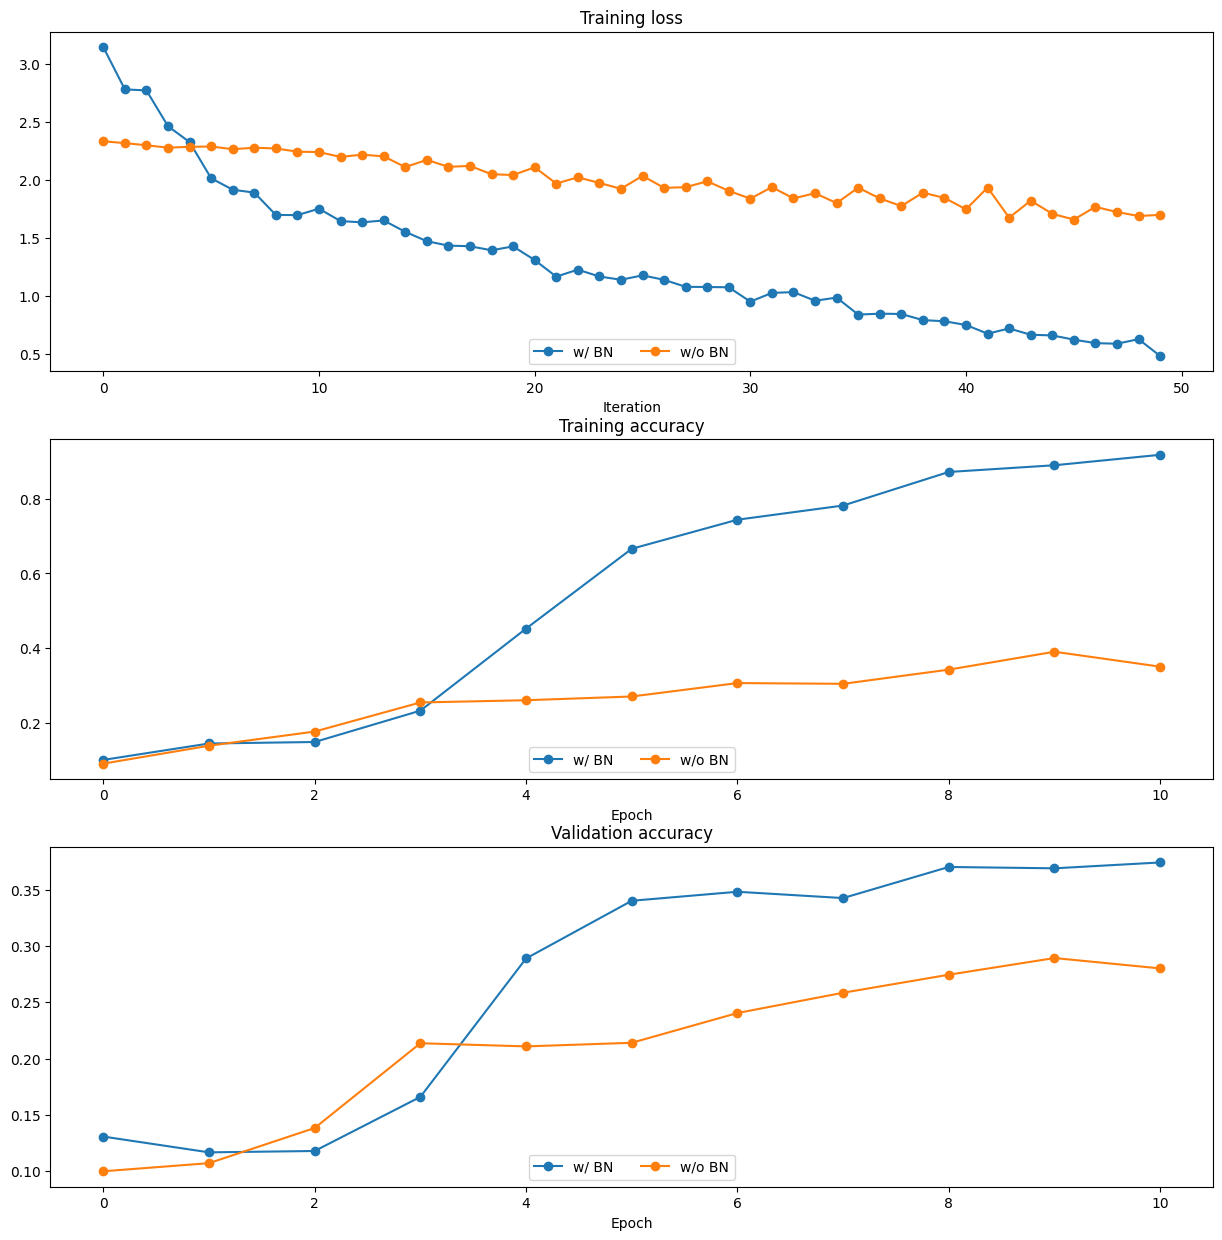

In [385]:
plt.subplot(3, 1, 1)
plot_training_history_bn('Training loss','Iteration', [solver], [bn_solver], \
                      lambda x: x.loss_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 2)
plot_training_history_bn('Training accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.train_acc_history, bl_marker='-o', bn_marker='-o')
plt.subplot(3, 1, 3)
plot_training_history_bn('Validation accuracy','Epoch', [solver], [bn_solver], \
                      lambda x: x.val_acc_history, bl_marker='-o', bn_marker='-o')

plt.gcf().set_size_inches(15, 15)
plt.show()

# Batch normalization and learning rate
We will now run a small experiment to study the interaction of batch normalization and learning rate.

The first cell will train convolutional networks with different learning rates. The second layer will plot training accuracy and validation set accuracy over time. You should find that using batch normalization helps the network to be less dependent to the learning rate.

In [386]:
fix_random_seed(0)

# Try training a very deep net with batchnorm
num_train = 10000
small_data = {
  'X_train': data_dict['X_train'][:num_train],
  'y_train': data_dict['y_train'][:num_train],
  'X_val': data_dict['X_val'],
  'y_val': data_dict['y_val'],
}
input_dims = data_dict['X_train'].shape[1:]
num_epochs = 5
lrs = [2e-1, 1e-1, 5e-2]
lrs = [5e-3, 1e-2, 2e-2]

solvers = []
for lr in lrs:
  print('No normalization: learning rate = ', lr)
  model = DeepConvNet(input_dims=input_dims, num_classes=10,
                      num_filters=[8, 8, 8],
                      max_pools=[0, 1, 2],
                      weight_scale='kaiming',
                      batchnorm=False,
                      reg=1e-5, **to_float_cuda)
  solver = Solver(model, small_data,
                  num_epochs=num_epochs, batch_size=100,
                  update_rule=sgd_momentum,
                  optim_config={
                    'learning_rate': lr,
                  },
                  verbose=False, device='cuda')
  solver.train()
  solvers.append(solver)

bn_solvers = []
for lr in lrs:
  print('Normalization: learning rate = ', lr)
  bn_model = DeepConvNet(input_dims=input_dims, num_classes=10,
                         num_filters=[8, 8, 16, 16, 32, 32],
                         max_pools=[1, 3, 5],
                         weight_scale='kaiming',
                         batchnorm=True,
                         reg=1e-5, **to_float_cuda)
  bn_solver = Solver(bn_model, small_data,
                     num_epochs=num_epochs, batch_size=128,
                     update_rule=sgd_momentum,
                     optim_config={
                       'learning_rate': lr,
                     },
                     verbose=False, device='cuda')
  bn_solver.train()
  bn_solvers.append(bn_solver)

No normalization: learning rate =  0.005
No normalization: learning rate =  0.01
No normalization: learning rate =  0.02
Normalization: learning rate =  0.005
Normalization: learning rate =  0.01
Normalization: learning rate =  0.02


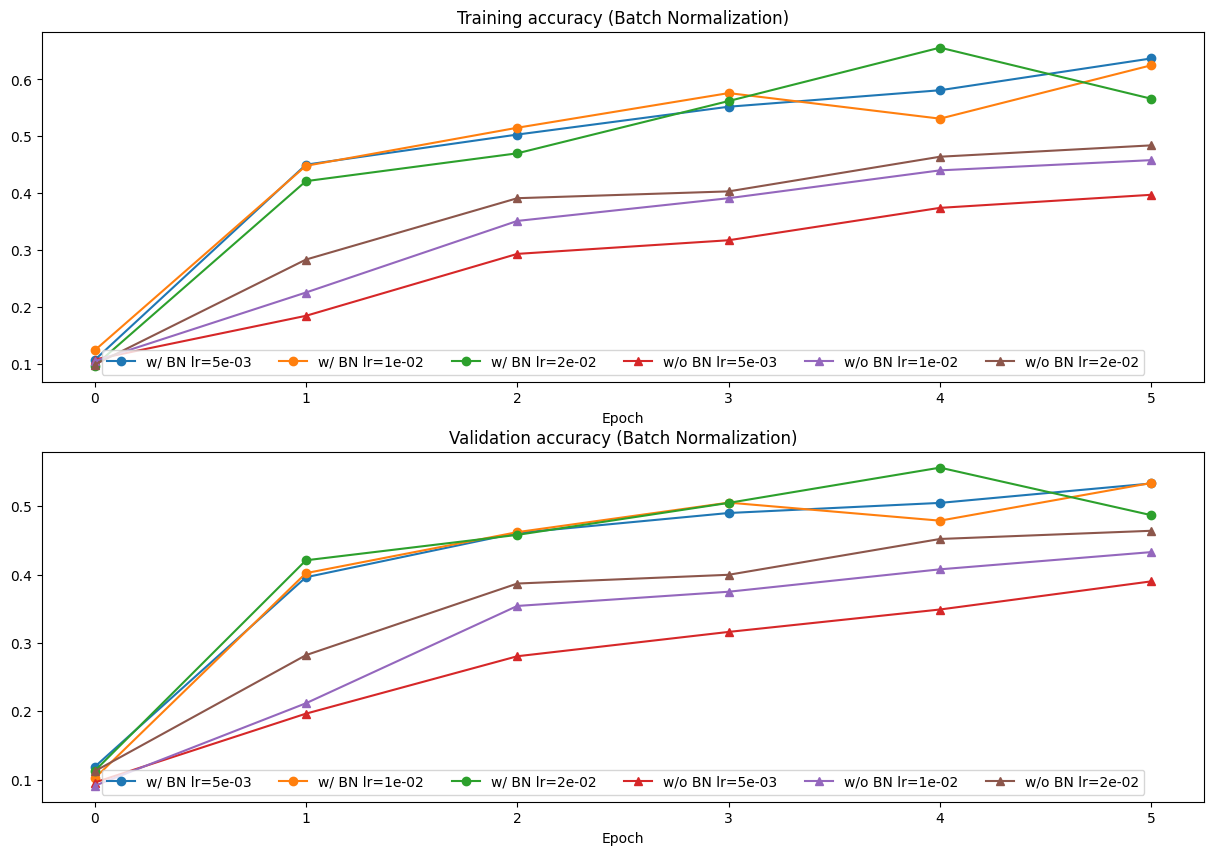

In [387]:
plt.subplot(2, 1, 1)
plot_training_history_bn('Training accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.train_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])
plt.subplot(2, 1, 2)
plot_training_history_bn('Validation accuracy (Batch Normalization)','Epoch', solvers, bn_solvers, \
                      lambda x: x.val_acc_history, bl_marker='-^', bn_marker='-o', labels=[' lr={:.0e}'.format(lr) for lr in lrs])

plt.gcf().set_size_inches(15, 10)
plt.show()